#Uploading The Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/Gall Bladder.csv')

In [5]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)

#Data Preprocessing

**Null Value Handling**

In [6]:
dataframe.head(2)

Age recode with <1 year olds     Sex  Year of diagnosis PRCDA 2020  \
0                  65-69 years  Female               2019  Not PRCDA   
1                    85+ years  Female               2014  Not PRCDA   

  Race recode (W, B, AI, API) Origin recode NHIA (Hispanic, Non-Hisp)  \
0                       White             Non-Spanish-Hispanic-Latino   
1   Asian or Pacific Islander             Non-Spanish-Hispanic-Latino   

  Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)  \
0                                 Non-Hispanic White           
1             Non-Hispanic Asian or Pacific Islander           

  TNM 7/CS v0204+ Schema (thru 2017)  \
0                                NaN   
1                        Gallbladder   

                       AYA site recode 2020 Revision  \
0  9.3.8 Carcinoma of gallbladder and other extra...   
1  9.3.8 Carcinoma of gallbladder and other extra...   

  ICCC site recode 3rd edition/IARC 2017  ...  Primary by international rules  \
0   XIf Other and unspecified carcinomas  ...                             Yes   
1   XIf Other and unspecified carcinomas  ...                             Yes   

  Record number recode Total number of in situ/malignant tumors for patient  \
0                    1                                                  2     
1                    2                                                  2     

  Total number of benign/borderline tumors for patient  \
0                                                  0     
1                                                  0     

                   Race recode (White, Black, Other)   Year of death recode  \
0                                              White  Alive at last contact   
1  Other (American Indian/AK Native, Asian/Pacifi...                   2014   

  Year of follow-up recode Patient ID Marital status at diagnosis  \
0                     2020      10900      Single (never married)   
1                     2014      29172                     Widowed   

                  Type of Reporting Source  
0  Hospital inpatient/outpatient or clinic  
1  Hospital inpatient/outpatient or clinic  

[2 rows x 100 columns]

In [7]:
#Number of cols
cols = dataframe.columns
cnt = 0
for i in cols:
  cnt+=1;
print('Num of Columns',cnt)

Num of Columns 100


In [8]:
dataframe.isnull().sum()/len(dataframe)*100

Age recode with <1 year olds    0.0
Sex                             0.0
Year of diagnosis               0.0
PRCDA 2020                      0.0
Race recode (W, B, AI, API)     0.0
                               ... 
Year of death recode            0.0
Year of follow-up recode        0.0
Patient ID                      0.0
Marital status at diagnosis     0.0
Type of Reporting Source        0.0
Length: 100, dtype: float64

In [9]:
"""import pandas as pd

selected_columns = [
       'Age recode with <1 year olds',
       'Sex',
       'Year of diagnosis',
       'PRCDA 2020',
       'Race recode (W, B, AI, API)',
       'Origin recode NHIA (Hispanic, Non-Hisp)',
       'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)',
       'TNM 7/CS v0204+ Schema (thru 2017)',
       'AYA site recode 2020 Revision',
       'ICCC site recode 3rd edition/IARC 2017',
       'Histologic Type ICD-O-3',
       'Grade Recode (thru 2017)',
       'Grade Clinical (2018+)',
       'Grade Pathological (2018+)',
       'Laterality', 'Diagnostic Confirmation',
       'ICD-O-3 Hist/behav',
       'ICD-O-3 Hist/behav, malignant',
       'Histology recode - broad groupings',
       'ICCC site recode extended 3rd edition/IARC 2017',
       'Schema ID (2018+)',
       'AJCC ID (2018+)',
       'EOD Schema ID Recode (2010+)',
       'Site recode - rare tumors',
       'Combined Summary Stage (2004+)',
       'SEER Combined Summary Stage 2000 (2004-2017)',
       'SEER historic stage A (1973-2015)',
       'Derived EOD 2018 T (2018+)',
       'Derived EOD 2018 N (2018+)',
       'Derived EOD 2018 M (2018+)',
       'Derived EOD 2018 Stage Group (2018+)',
       'Derived AJCC Stage Group, 7th ed (2010-2015)',
       'Derived AJCC T, 7th ed (2010-2015)',
       'Derived AJCC N, 7th ed (2010-2015)',
       'Derived AJCC M, 7th ed (2010-2015)',
       '7th Edition Stage Group Recode (2016-2017)',
       'Derived SEER Cmb Stg Grp (2016-2017)',
       'Derived SEER Combined T (2016-2017)',
       'Derived SEER Combined N (2016-2017)',
       'Derived SEER Combined M (2016-2017)',
       'Derived SEER Combined T Src (2016-2017)',
       'Derived SEER Combined N Src (2016-2017)',
       'Derived SEER Combined M Src (2016-2017)',
       'Derived AJCC Stage Group, 6th ed (2004-2015)',
       'Derived AJCC T, 6th ed (2004-2015)',
       'Derived AJCC N, 6th ed (2004-2015)',
       'Derived AJCC M, 6th ed (2004-2015)',
       'AJCC stage 3rd edition (1988-2003)',
       'SEER modified AJCC stage 3rd (1988-2003)',
       'T value - based on AJCC 3rd (1988-2003)',
       'N value - based on AJCC 3rd (1988-2003)',
       'M value - based on AJCC 3rd (1988-2003)',
       'TNM Edition Number (2016-2017)',
       'RX Summ--Surg Prim Site (1998+)',
       'RX Summ--Scope Reg LN Sur (2003+)',
       'RX Summ--Surg Oth Reg/Dis (2003+)',
       'RX Summ--Surg/Rad Seq',
       'Reason no cancer-directed surgery',
       'Radiation recode',
       'Chemotherapy recode (yes, no/unk)',
       'Scope of reg lymph nd surg (1998-2002)',
       'RX Summ--Reg LN Examined (1998-2002)',
       'Surgery of oth reg/dis sites (1998-2002)',
       'RX Summ--Systemic/Sur Seq (2007+)',
       'Months from diagnosis to treatment', 'EOD Primary Tumor (2018+)',
       'EOD Regional Nodes (2018+)',
       'EOD Mets (2018+)',
       'Tumor Size Summary (2016+)',
       'Regional nodes examined (1988+)',
       'Regional nodes positive (1988+)',
       'SEER Combined Mets at DX-bone (2010+)',
       'SEER Combined Mets at DX-brain (2010+)',
       'SEER Combined Mets at DX-liver (2010+)',
       'SEER Combined Mets at DX-lung (2010+)',
       'Mets at DX-Distant LN (2016+)',
       'Mets at DX-Other (2016+)',
       'CS tumor size (2004-2015)',
       'CS extension (2004-2015)',
       'CS lymph nodes (2004-2015)',
       'CS mets at dx (2004-2015)',
       'CS Tumor Size/Ext Eval (2004-2015)',
       'CS Reg Node Eval (2004-2015)',
       'CS Mets Eval (2004-2015)',
       'CS version derived (2004-2015)',
       'COD to site recode',
       'Survival months',
       'COD to site recode ICD-O-3 2023 Revision',
       'Vital status recode (study cutoff used)',
       'First malignant primary indicator',
       'Primary by international rules',
       'Record number recode',
       'Total number of in situ/malignant tumors for patient',
       'Total number of benign/borderline tumors for patient',
       'Race recode (White, Black, Other)',
       'Year of death recode',
       'Year of follow-up recode',
       'Patient ID',
       'Marital status at diagnosis',
       'Type of Reporting Source'

]"""

"import pandas as pd\n\nselected_columns = [\n       'Age recode with <1 year olds',\n       'Sex',\n       'Year of diagnosis',\n       'PRCDA 2020',\n       'Race recode (W, B, AI, API)',\n       'Origin recode NHIA (Hispanic, Non-Hisp)',\n       'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)',\n       'TNM 7/CS v0204+ Schema (thru 2017)',\n       'AYA site recode 2020 Revision',\n       'ICCC site recode 3rd edition/IARC 2017',\n       'Histologic Type ICD-O-3',\n       'Grade Recode (thru 2017)',\n       'Grade Clinical (2018+)',\n       'Grade Pathological (2018+)',\n       'Laterality', 'Diagnostic Confirmation',\n       'ICD-O-3 Hist/behav',\n       'ICD-O-3 Hist/behav, malignant',\n       'Histology recode - broad groupings',\n       'ICCC site recode extended 3rd edition/IARC 2017',\n       'Schema ID (2018+)',\n       'AJCC ID (2018+)',\n       'EOD Schema ID Recode (2010+)',\n       'Site recode - rare tumors',\n       'Combined Summary Stage (2004+)',\n       '

In [10]:
import pandas as pd

selected_columns = [

       'Radiation recode',
       'Chemotherapy recode (yes, no/unk)',
       'Scope of reg lymph nd surg (1998-2002)',
       'Surgery of oth reg/dis sites (1998-2002)',
       'Tumor Size Summary (2016+)',
       'Mets at DX-Distant LN (2016+)',
       'Mets at DX-Other (2016+)',
       'COD to site recode ICD-O-3 2023 Revision',
       'Vital status recode (study cutoff used)',
       'Primary by international rules',
       'Record number recode',
       'Total number of in situ/malignant tumors for patient',
       'Total number of benign/borderline tumors for patient',
       'AYA site recode 2020 Revision',
       'First malignant primary indicator',
       'Marital status at diagnosis',
       'Race recode (White, Black, Other)',
       'Race recode (W, B, AI, API)',
       'Origin recode NHIA (Hispanic, Non-Hisp)',
       'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)',
       'Year of diagnosis',
       'Histology recode - broad groupings',
       'Histologic Type ICD-O-3',
       'ICD-O-3 Hist/behav',
       'ICD-O-3 Hist/behav, malignant',
       'Derived EOD 2018 Stage Group (2018+)',
       'Grade Recode (thru 2017)',
       'Grade Clinical (2018+)',
       'Grade Pathological (2018+)',
       'EOD Primary Tumor (2018+)',
       'EOD Regional Nodes (2018+)',
       'EOD Mets (2018+)',
       'Regional nodes examined (1988+)',
       'Regional nodes positive (1988+)',
       'EOD Schema ID Recode (2010+)',
       'CS tumor size (2004-2015)',
       'CS extension (2004-2015)',
       'CS lymph nodes (2004-2015)',
       'CS mets at dx (2004-2015)',
       'CS Tumor Size/Ext Eval (2004-2015)',
       'CS Reg Node Eval (2004-2015)',
       'CS Mets Eval (2004-2015)',
       'CS version derived (2004-2015)',
       'COD to site recode',
       'SEER Combined Summary Stage 2000 (2004-2017)',
       'SEER historic stage A (1973-2015)',
       'Derived AJCC Stage Group, 6th ed (2004-2015)',
       'AJCC stage 3rd edition (1988-2003)',
       'RX Summ--Surg Prim Site (1998+)',
       'RX Summ--Scope Reg LN Sur (2003+)',
       'RX Summ--Surg Oth Reg/Dis (2003+)',
       'RX Summ--Reg LN Examined (1998-2002)',
       'Derived AJCC Stage Group, 7th ed (2010-2015)',
       '7th Edition Stage Group Recode (2016-2017)',
       'SEER modified AJCC stage 3rd (1988-2003)',


]

In [11]:
# Create a new dataframe with only the selected columns
df = dataframe[selected_columns]

# Display the first few rows of the new dataframe
#print(selected_df.head())

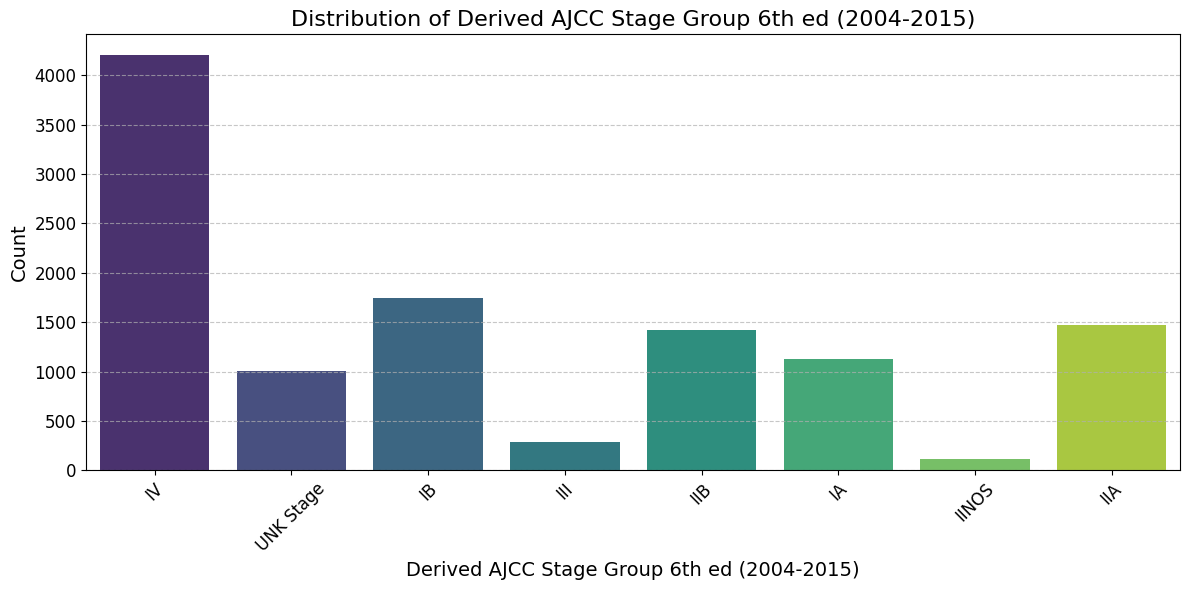

In [12]:
# prompt: make the visualization more beautiful

import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each stage group
stage_counts = dataframe['Derived AJCC Stage Group, 6th ed (2004-2015)'].value_counts()

# Create a bar plot with Seaborn for enhanced aesthetics
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.countplot(x='Derived AJCC Stage Group, 6th ed (2004-2015)', data=dataframe, palette='viridis')
plt.xlabel('Derived AJCC Stage Group 6th ed (2004-2015)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Derived AJCC Stage Group 6th ed (2004-2015)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


#Droping columns with Null values more than 50%

In [13]:
df.isnull().sum()/len(df)*100

Radiation recode                                               0.000000
Chemotherapy recode (yes, no/unk)                              0.000000
Scope of reg lymph nd surg (1998-2002)                        88.362383
Surgery of oth reg/dis sites (1998-2002)                      88.362383
Tumor Size Summary (2016+)                                    72.224110
Mets at DX-Distant LN (2016+)                                 72.224110
Mets at DX-Other (2016+)                                      72.224110
COD to site recode ICD-O-3 2023 Revision                       0.000000
Vital status recode (study cutoff used)                        0.000000
Primary by international rules                                 0.000000
Record number recode                                           0.000000
Total number of in situ/malignant tumors for patient           0.000000
Total number of benign/borderline tumors for patient           0.000000
AYA site recode 2020 Revision                                  0.000000
First malignant primary indicator                              0.000000
Marital status at diagnosis                                    0.000000
Race recode (White, Black, Other)                              0.000000
Race recode (W, B, AI, API)                                    0.000000
Origin recode NHIA (Hispanic, Non-Hisp)                        0.000000
Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)     0.000000
Year of diagnosis                                              0.000000
Histology recode - broad groupings                             0.000000
Histologic Type ICD-O-3                                        0.000000
ICD-O-3 Hist/behav                                             0.000000
ICD-O-3 Hist/behav, malignant                                  0.000000
Derived EOD 2018 Stage Group (2018+)                          83.046075
Grade Recode (thru 2017)                                       0.000000
Grade Clinical (2018+)                                        83.046075
Grade Pathological (2018+)                                    83.046075
EOD Primary Tumor (2018+)                                     83.046075
EOD Regional Nodes (2018+)                                    83.046075
EOD Mets (2018+)                                              83.046075
Regional nodes examined (1988+)                                0.000000
Regional nodes positive (1988+)                                0.000000
EOD Schema ID Recode (2010+)                                  41.714813
CS tumor size (2004-2015)                                     43.618003
CS extension (2004-2015)                                      43.618003
CS lymph nodes (2004-2015)                                    43.618003
CS mets at dx (2004-2015)                                     43.618003
CS Tumor Size/Ext Eval (2004-2015)                            45.040540
CS Reg Node Eval (2004-2015)                                  45.040540
CS Mets Eval (2004-2015)                                      45.040540
CS version derived (2004-2015)                                43.618003
COD to site recode                                             0.000000
SEER Combined Summary Stage 2000 (2004-2017)                  32.796038
SEER historic stage A (1973-2015)                             27.775890
Derived AJCC Stage Group, 6th ed (2004-2015)                  44.754090
AJCC stage 3rd edition (1988-2003)                            84.157887
RX Summ--Surg Prim Site (1998+)                                0.000000
RX Summ--Scope Reg LN Sur (2003+)                             71.825994
RX Summ--Surg Oth Reg/Dis (2003+)                             11.637617
RX Summ--Reg LN Examined (1998-2002)                          88.362383
Derived AJCC Stage Group, 7th ed (2010-2015)                  70.073312
7th Edition Stage Group Recode (2016-2017)                    89.454775
SEER modified AJCC stage 3rd (1988-2003)                      84.157887
dtype: float64

In [14]:
keep_columns = []
for column in df.columns:
  if df[column].isnull().sum()/len(df)*100 < 50:
    keep_columns.append(column)

# Create a new dataframe with only the selected columns
df = df[keep_columns]

# Display the first few rows of the new dataframe
df.isnull().sum()/len(df)*100


Radiation recode                                               0.000000
Chemotherapy recode (yes, no/unk)                              0.000000
COD to site recode ICD-O-3 2023 Revision                       0.000000
Vital status recode (study cutoff used)                        0.000000
Primary by international rules                                 0.000000
Record number recode                                           0.000000
Total number of in situ/malignant tumors for patient           0.000000
Total number of benign/borderline tumors for patient           0.000000
AYA site recode 2020 Revision                                  0.000000
First malignant primary indicator                              0.000000
Marital status at diagnosis                                    0.000000
Race recode (White, Black, Other)                              0.000000
Race recode (W, B, AI, API)                                    0.000000
Origin recode NHIA (Hispanic, Non-Hisp)                        0.000000
Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)     0.000000
Year of diagnosis                                              0.000000
Histology recode - broad groupings                             0.000000
Histologic Type ICD-O-3                                        0.000000
ICD-O-3 Hist/behav                                             0.000000
ICD-O-3 Hist/behav, malignant                                  0.000000
Grade Recode (thru 2017)                                       0.000000
Regional nodes examined (1988+)                                0.000000
Regional nodes positive (1988+)                                0.000000
EOD Schema ID Recode (2010+)                                  41.714813
CS tumor size (2004-2015)                                     43.618003
CS extension (2004-2015)                                      43.618003
CS lymph nodes (2004-2015)                                    43.618003
CS mets at dx (2004-2015)                                     43.618003
CS Tumor Size/Ext Eval (2004-2015)                            45.040540
CS Reg Node Eval (2004-2015)                                  45.040540
CS Mets Eval (2004-2015)                                      45.040540
CS version derived (2004-2015)                                43.618003
COD to site recode                                             0.000000
SEER Combined Summary Stage 2000 (2004-2017)                  32.796038
SEER historic stage A (1973-2015)                             27.775890
Derived AJCC Stage Group, 6th ed (2004-2015)                  44.754090
RX Summ--Surg Prim Site (1998+)                                0.000000
RX Summ--Surg Oth Reg/Dis (2003+)                             11.637617
dtype: float64

#Dropna rest of the rows with null values

In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()/len(df)*100


Radiation recode                                              0.0
Chemotherapy recode (yes, no/unk)                             0.0
COD to site recode ICD-O-3 2023 Revision                      0.0
Vital status recode (study cutoff used)                       0.0
Primary by international rules                                0.0
Record number recode                                          0.0
Total number of in situ/malignant tumors for patient          0.0
Total number of benign/borderline tumors for patient          0.0
AYA site recode 2020 Revision                                 0.0
First malignant primary indicator                             0.0
Marital status at diagnosis                                   0.0
Race recode (White, Black, Other)                             0.0
Race recode (W, B, AI, API)                                   0.0
Origin recode NHIA (Hispanic, Non-Hisp)                       0.0
Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)    0.0
Year of diagnosis                                             0.0
Histology recode - broad groupings                            0.0
Histologic Type ICD-O-3                                       0.0
ICD-O-3 Hist/behav                                            0.0
ICD-O-3 Hist/behav, malignant                                 0.0
Grade Recode (thru 2017)                                      0.0
Regional nodes examined (1988+)                               0.0
Regional nodes positive (1988+)                               0.0
EOD Schema ID Recode (2010+)                                  0.0
CS tumor size (2004-2015)                                     0.0
CS extension (2004-2015)                                      0.0
CS lymph nodes (2004-2015)                                    0.0
CS mets at dx (2004-2015)                                     0.0
CS Tumor Size/Ext Eval (2004-2015)                            0.0
CS Reg Node Eval (2004-2015)                                  0.0
CS Mets Eval (2004-2015)                                      0.0
CS version derived (2004-2015)                                0.0
COD to site recode                                            0.0
SEER Combined Summary Stage 2000 (2004-2017)                  0.0
SEER historic stage A (1973-2015)                             0.0
Derived AJCC Stage Group, 6th ed (2004-2015)                  0.0
RX Summ--Surg Prim Site (1998+)                               0.0
RX Summ--Surg Oth Reg/Dis (2003+)                             0.0
dtype: float64

In [17]:
dataframe['Derived AJCC Stage Group, 6th ed (2004-2015)'].value_counts()

Derived AJCC Stage Group, 6th ed (2004-2015)
IV           4206
IB           1746
IIA          1473
IIB          1422
IA           1125
UNK Stage    1008
III           289
IINOS         110
Name: count, dtype: int64

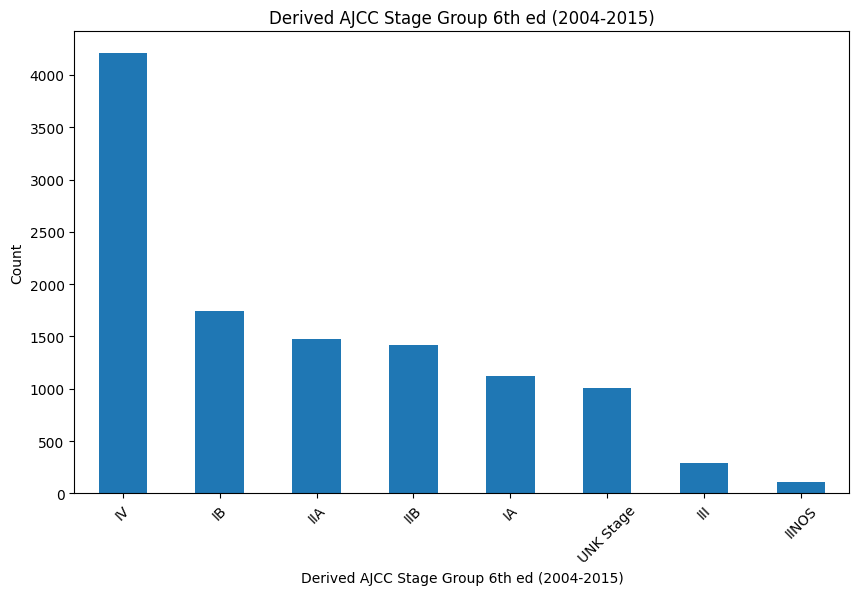

In [18]:
# prompt: give me a visualization of the above cell

import matplotlib.pyplot as plt

# Count the occurrences of each stage group
stage_counts = dataframe['Derived AJCC Stage Group, 6th ed (2004-2015)'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
stage_counts.plot(kind='bar')
plt.xlabel('Derived AJCC Stage Group 6th ed (2004-2015)')
plt.ylabel('Count')
plt.title('Derived AJCC Stage Group 6th ed (2004-2015)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


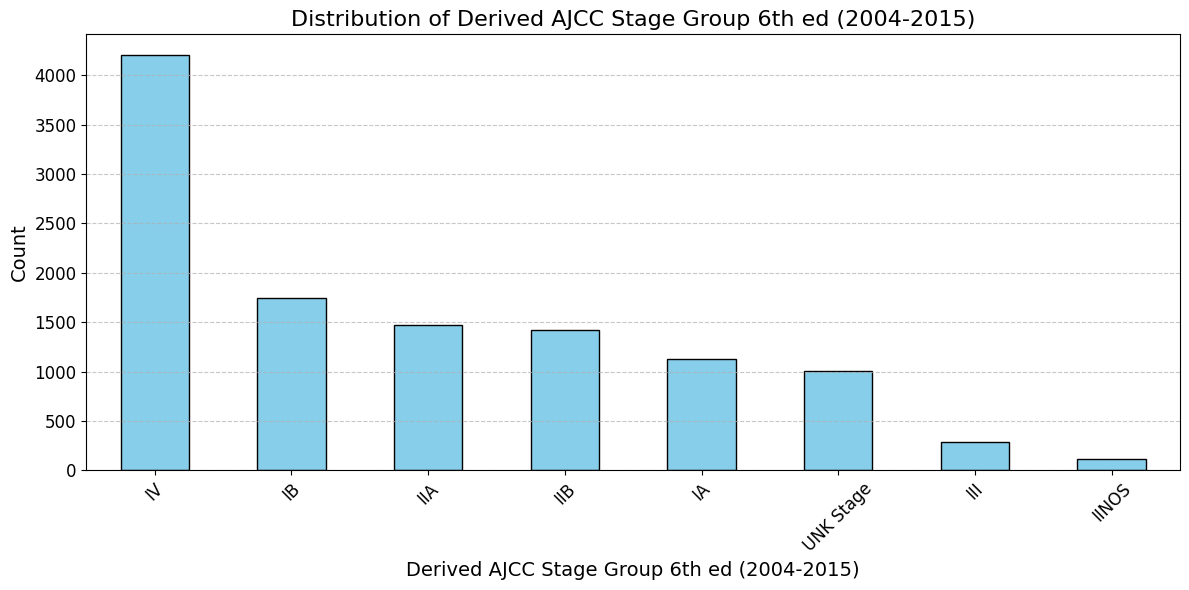

In [19]:
# prompt: make the visualization more beautiful

# Count the occurrences of each stage group
stage_counts = dataframe['Derived AJCC Stage Group, 6th ed (2004-2015)'].value_counts()

# Create a bar plot with improved aesthetics
plt.figure(figsize=(12, 6))  # Adjust figure size
stage_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Derived AJCC Stage Group 6th ed (2004-2015)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Derived AJCC Stage Group 6th ed (2004-2015)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


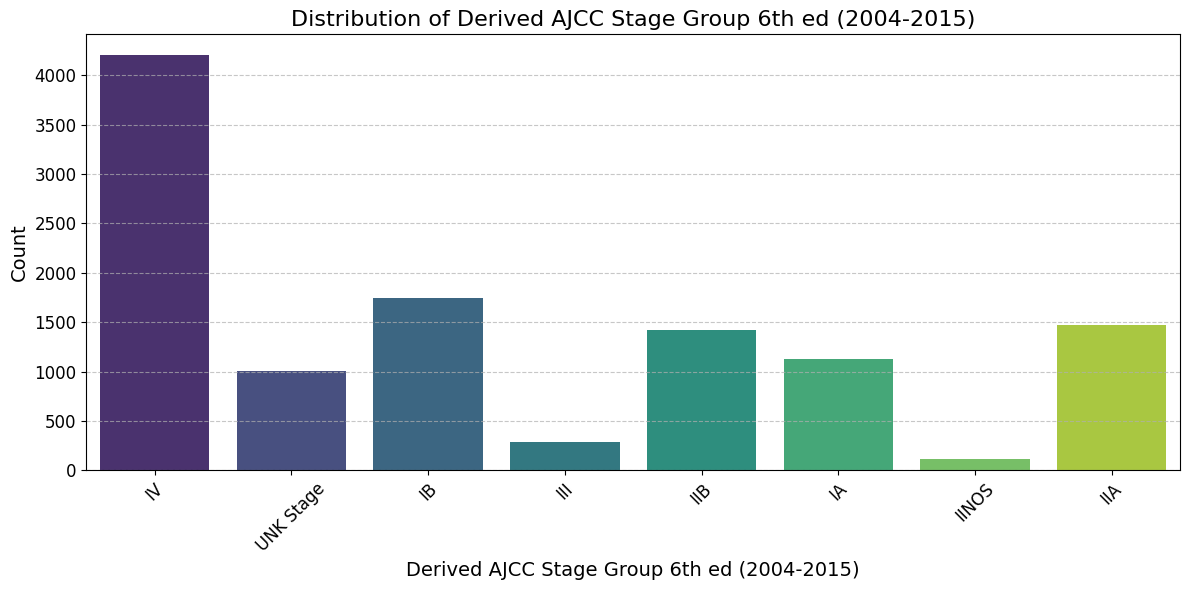

In [20]:
# prompt: make the visualization more beautiful

import seaborn as sns

# Count the occurrences of each stage group
stage_counts = dataframe['Derived AJCC Stage Group, 6th ed (2004-2015)'].value_counts()

# Create a bar plot with Seaborn for enhanced aesthetics
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.countplot(x='Derived AJCC Stage Group, 6th ed (2004-2015)', data=dataframe, palette='viridis')
plt.xlabel('Derived AJCC Stage Group 6th ed (2004-2015)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Derived AJCC Stage Group 6th ed (2004-2015)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


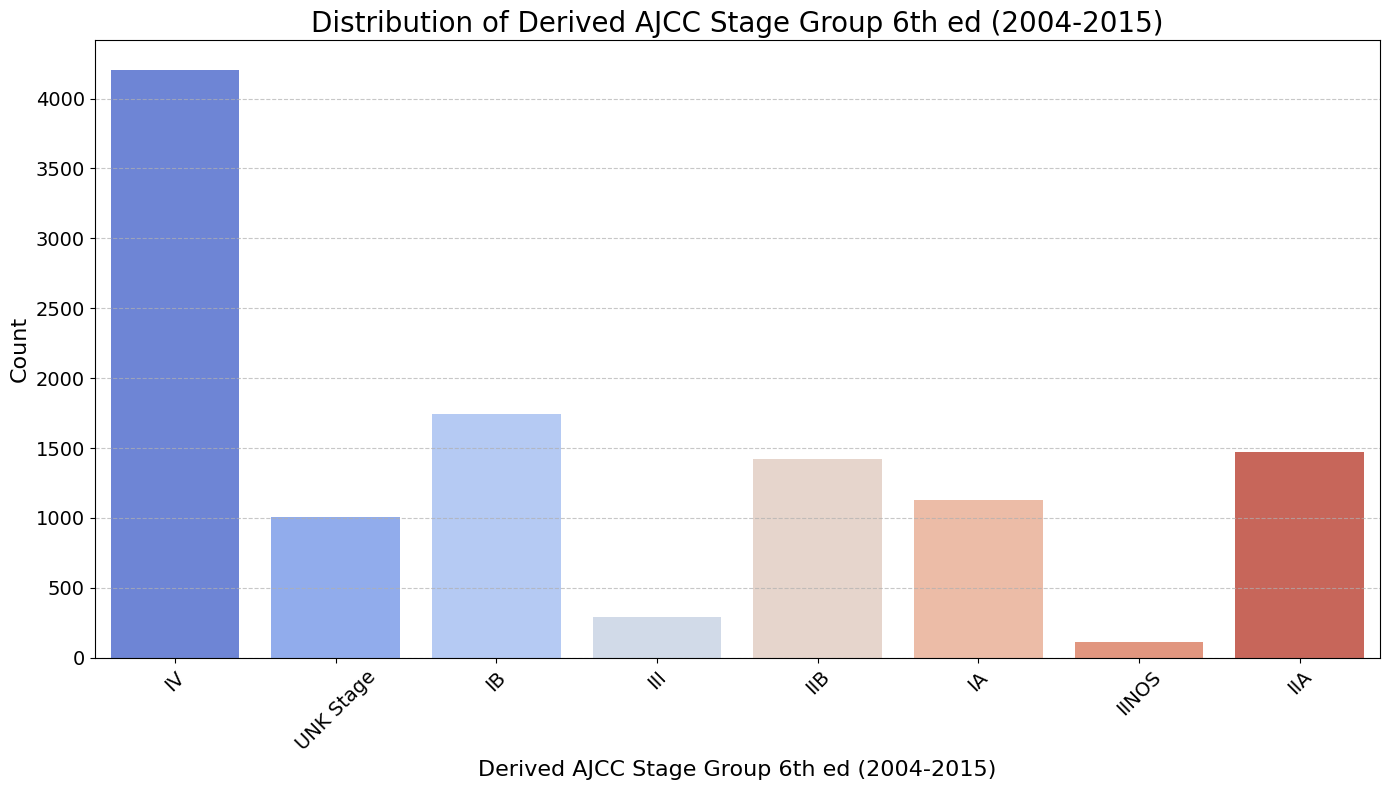

In [21]:
# prompt: make the visualization more beautiful

# Count the occurrences of each stage group
stage_counts = dataframe['Derived AJCC Stage Group, 6th ed (2004-2015)'].value_counts()

# Create a bar plot with Seaborn for enhanced aesthetics
plt.figure(figsize=(14, 8))  # Increase figure size
sns.countplot(x='Derived AJCC Stage Group, 6th ed (2004-2015)', data=dataframe, palette='coolwarm')
plt.xlabel('Derived AJCC Stage Group 6th ed (2004-2015)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Distribution of Derived AJCC Stage Group 6th ed (2004-2015)', fontsize=20)
plt.xticks(rotation=45, fontsize=14)  # Increase font size for x-axis labels
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


#Cateragorical Encoding for the columns of Object

In [22]:
# Assuming 'df' is your DataFrame
import pandas as pd

# Iterate over columns and encode object columns
for col in df.columns:
    if df[col].dtype == "object":
        df[col], _ = pd.factorize(df[col])

# Display the updated DataFrame
print(df.head())


    Radiation recode  Chemotherapy recode (yes, no/unk)  \
1                  0                                  0   
5                  0                                  1   
9                  0                                  1   
14                 0                                  1   
16                 1                                  0   

    COD to site recode ICD-O-3 2023 Revision  \
1                                          0   
5                                          1   
9                                          2   
14                                         1   
16                                         3   

    Vital status recode (study cutoff used)  Primary by international rules  \
1                                         0                               0   
5                                         0                               0   
9                                         1                               0   
14                                      

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6156 entries, 1 to 20406
Data columns (total 38 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Radiation recode                                            6156 non-null   int64  
 1   Chemotherapy recode (yes, no/unk)                           6156 non-null   int64  
 2   COD to site recode ICD-O-3 2023 Revision                    6156 non-null   int64  
 3   Vital status recode (study cutoff used)                     6156 non-null   int64  
 4   Primary by international rules                              6156 non-null   int64  
 5   Record number recode                                        6156 non-null   int64  
 6   Total number of in situ/malignant tumors for patient        6156 non-null   int64  
 7   Total number of benign/borderline tumors for patient        6156 non-null   int64  
 8   AY

# Selecting Common Columns with 3 Feature selection Technique and Correlation

#Dividing X and Y

In [24]:
x = df.drop(['Derived AJCC Stage Group, 6th ed (2004-2015)'], axis=1)
y = df['Derived AJCC Stage Group, 6th ed (2004-2015)']

#chi^2 feature selection**

In [25]:
import numpy as np

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeature = SelectKBest(score_func=chi2,k=30)
fit = bestfeature.fit(x,y)

dfscore = pd.DataFrame(fit.scores_)
dfcols = pd.DataFrame(x.columns)

featureScore = pd.concat([dfcols,dfscore],axis=1)
featureScore.columns = ['features','Score']

chi2_results = featureScore.sort_values(by='Score', ascending=False)
print(chi2_results.head(10))


                                        features         Score
26                    CS lymph nodes (2004-2015)  1.436859e+06
25                      CS extension (2004-2015)  3.362127e+05
24                     CS tumor size (2004-2015)  3.073440e+05
27                     CS mets at dx (2004-2015)  1.707017e+05
21               Regional nodes examined (1988+)  9.714567e+04
22               Regional nodes positive (1988+)  4.122609e+04
35               RX Summ--Surg Prim Site (1998+)  2.688020e+04
30                      CS Mets Eval (2004-2015)  1.255150e+04
33  SEER Combined Summary Stage 2000 (2004-2017)  8.076836e+03
29                  CS Reg Node Eval (2004-2015)  5.706555e+03


In [26]:
selected_features_chi2 = chi2_results['features'].head(25).tolist()
print(selected_features_chi2)


['CS lymph nodes (2004-2015)', 'CS extension (2004-2015)', 'CS tumor size (2004-2015)', 'CS mets at dx (2004-2015)', 'Regional nodes examined (1988+)', 'Regional nodes positive (1988+)', 'RX Summ--Surg Prim Site (1998+)', 'CS Mets Eval (2004-2015)', 'SEER Combined Summary Stage 2000 (2004-2017)', 'CS Reg Node Eval (2004-2015)', 'SEER historic stage A (1973-2015)', 'CS Tumor Size/Ext Eval (2004-2015)', 'Grade Recode (thru 2017)', 'AYA site recode 2020 Revision', 'Vital status recode (study cutoff used)', 'COD to site recode ICD-O-3 2023 Revision', 'RX Summ--Surg Oth Reg/Dis (2003+)', 'ICD-O-3 Hist/behav, malignant', 'ICD-O-3 Hist/behav', 'Histology recode - broad groupings', 'Radiation recode', 'Histologic Type ICD-O-3', 'COD to site recode', 'Chemotherapy recode (yes, no/unk)', 'Total number of in situ/malignant tumors for patient']


#Anova Feature Selection Technique

In [27]:
from sklearn.feature_selection import f_classif
import numpy as np

# Perform ANOVA feature selection
F_values, p_values = f_classif(x, y)

# Create a DataFrame to store the results
anova_results = pd.DataFrame({'Feature': x.columns, 'F-value': F_values, 'p-value': p_values})

# Sort the DataFrame by p-value
anova_results = anova_results.sort_values(by='F-value', ascending=False)

# Print the top 10 features
print(anova_results.head(10))


                                         Feature      F-value        p-value
33  SEER Combined Summary Stage 2000 (2004-2017)  8200.795896   0.000000e+00
27                     CS mets at dx (2004-2015)  2626.756639   0.000000e+00
34             SEER historic stage A (1973-2015)  2414.283429   0.000000e+00
25                      CS extension (2004-2015)   943.770443   0.000000e+00
30                      CS Mets Eval (2004-2015)   748.629054   0.000000e+00
26                    CS lymph nodes (2004-2015)   566.988834   0.000000e+00
22               Regional nodes positive (1988+)   278.118774   0.000000e+00
29                  CS Reg Node Eval (2004-2015)   257.103538   0.000000e+00
35               RX Summ--Surg Prim Site (1998+)   238.100016  1.894035e-314
21               Regional nodes examined (1988+)   224.243836  7.932775e-298


In [28]:
selected_features_anova = list(anova_results['Feature'].head(25))
print(selected_features_anova)

['SEER Combined Summary Stage 2000 (2004-2017)', 'CS mets at dx (2004-2015)', 'SEER historic stage A (1973-2015)', 'CS extension (2004-2015)', 'CS Mets Eval (2004-2015)', 'CS lymph nodes (2004-2015)', 'Regional nodes positive (1988+)', 'CS Reg Node Eval (2004-2015)', 'RX Summ--Surg Prim Site (1998+)', 'Regional nodes examined (1988+)', 'CS Tumor Size/Ext Eval (2004-2015)', 'Grade Recode (thru 2017)', 'Vital status recode (study cutoff used)', 'AYA site recode 2020 Revision', 'Chemotherapy recode (yes, no/unk)', 'CS tumor size (2004-2015)', 'RX Summ--Surg Oth Reg/Dis (2003+)', 'Radiation recode', 'Histologic Type ICD-O-3', 'Histology recode - broad groupings', 'COD to site recode ICD-O-3 2023 Revision', 'ICD-O-3 Hist/behav, malignant', 'ICD-O-3 Hist/behav', 'Marital status at diagnosis', 'COD to site recode']


#Extra Tree Classifier**

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

# Create an Extra Trees classifier
model_ExtraTree = ExtraTreesClassifier()

# Fit the model to the data
model_ExtraTree.fit(x, y)

# Get the feature importances
importances = model_ExtraTree.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

# Sort the dataframe by importance
extra_tree_results = feature_importances.sort_values('importance', ascending=False)

# Print the feature importances
print(extra_tree_results.head(10))


                                         feature  importance
33  SEER Combined Summary Stage 2000 (2004-2017)    0.230186
34             SEER historic stage A (1973-2015)    0.204328
25                      CS extension (2004-2015)    0.161298
27                     CS mets at dx (2004-2015)    0.104933
26                    CS lymph nodes (2004-2015)    0.066999
30                      CS Mets Eval (2004-2015)    0.044032
22               Regional nodes positive (1988+)    0.028619
35               RX Summ--Surg Prim Site (1998+)    0.018743
28            CS Tumor Size/Ext Eval (2004-2015)    0.017726
29                  CS Reg Node Eval (2004-2015)    0.016427


In [30]:
selected_features_ExtraTree = list(extra_tree_results['feature'].head(25))
print(selected_features_ExtraTree)


['SEER Combined Summary Stage 2000 (2004-2017)', 'SEER historic stage A (1973-2015)', 'CS extension (2004-2015)', 'CS mets at dx (2004-2015)', 'CS lymph nodes (2004-2015)', 'CS Mets Eval (2004-2015)', 'Regional nodes positive (1988+)', 'RX Summ--Surg Prim Site (1998+)', 'CS Tumor Size/Ext Eval (2004-2015)', 'CS Reg Node Eval (2004-2015)', 'Vital status recode (study cutoff used)', 'Chemotherapy recode (yes, no/unk)', 'Grade Recode (thru 2017)', 'Regional nodes examined (1988+)', 'CS tumor size (2004-2015)', 'Year of diagnosis', 'Marital status at diagnosis', 'COD to site recode ICD-O-3 2023 Revision', 'COD to site recode', 'ICD-O-3 Hist/behav', 'Histologic Type ICD-O-3', 'Radiation recode', 'Total number of in situ/malignant tumors for patient', 'ICD-O-3 Hist/behav, malignant', 'RX Summ--Surg Oth Reg/Dis (2003+)']


#Finding The Corelation for Columns

In [31]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Select the desired column
target_column = 'Derived AJCC Stage Group, 6th ed (2004-2015)'

# Get the correlations of the target column with other columns
correlations = correlation_matrix[target_column].sort_values(ascending=False)

# Display the top 5 most correlated columns
print(correlations.head(20))


Derived AJCC Stage Group, 6th ed (2004-2015)    1.000000
SEER Combined Summary Stage 2000 (2004-2017)    0.828786
SEER historic stage A (1973-2015)               0.730270
RX Summ--Surg Prim Site (1998+)                 0.304344
Grade Recode (thru 2017)                        0.298605
Vital status recode (study cutoff used)         0.174615
Radiation recode                                0.155159
Histologic Type ICD-O-3                         0.100073
CS Tumor Size/Ext Eval (2004-2015)              0.096009
ICD-O-3 Hist/behav, malignant                   0.046078
ICD-O-3 Hist/behav                              0.046078
Origin recode NHIA (Hispanic, Non-Hisp)         0.020978
Primary by international rules                  0.017991
EOD Schema ID Recode (2010+)                    0.015835
Record number recode                            0.014872
Chemotherapy recode (yes, no/unk)               0.014674
COD to site recode ICD-O-3 2023 Revision        0.013752
Year of diagnosis              

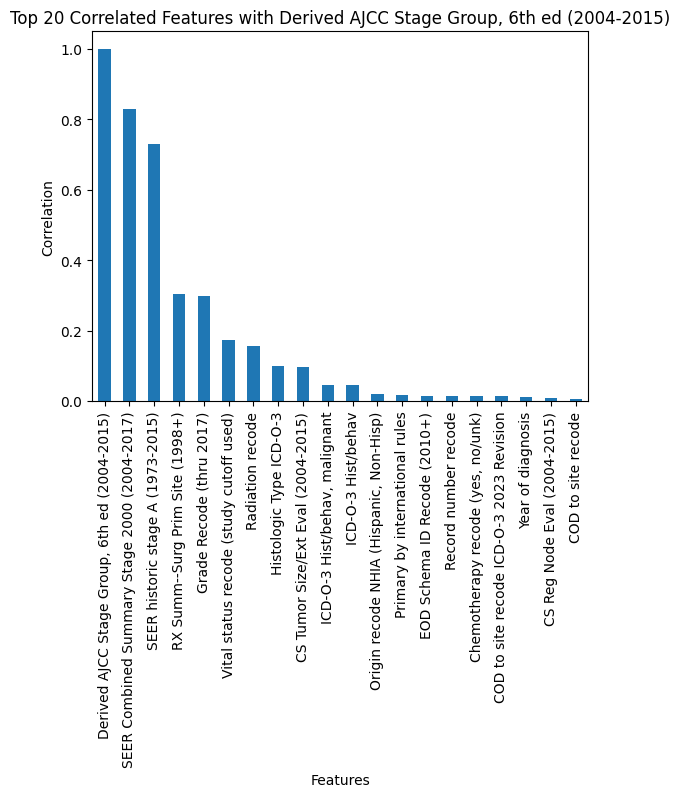

In [32]:
import matplotlib.pyplot as plt

# Create a bar chart of the correlations
correlations.head(20).plot(kind='bar')

# Add title and axis labels
plt.title('Top 20 Correlated Features with Derived AJCC Stage Group, 6th ed (2004-2015)')
plt.xlabel('Features')
plt.ylabel('Correlation')

# Show the plot
plt.show()


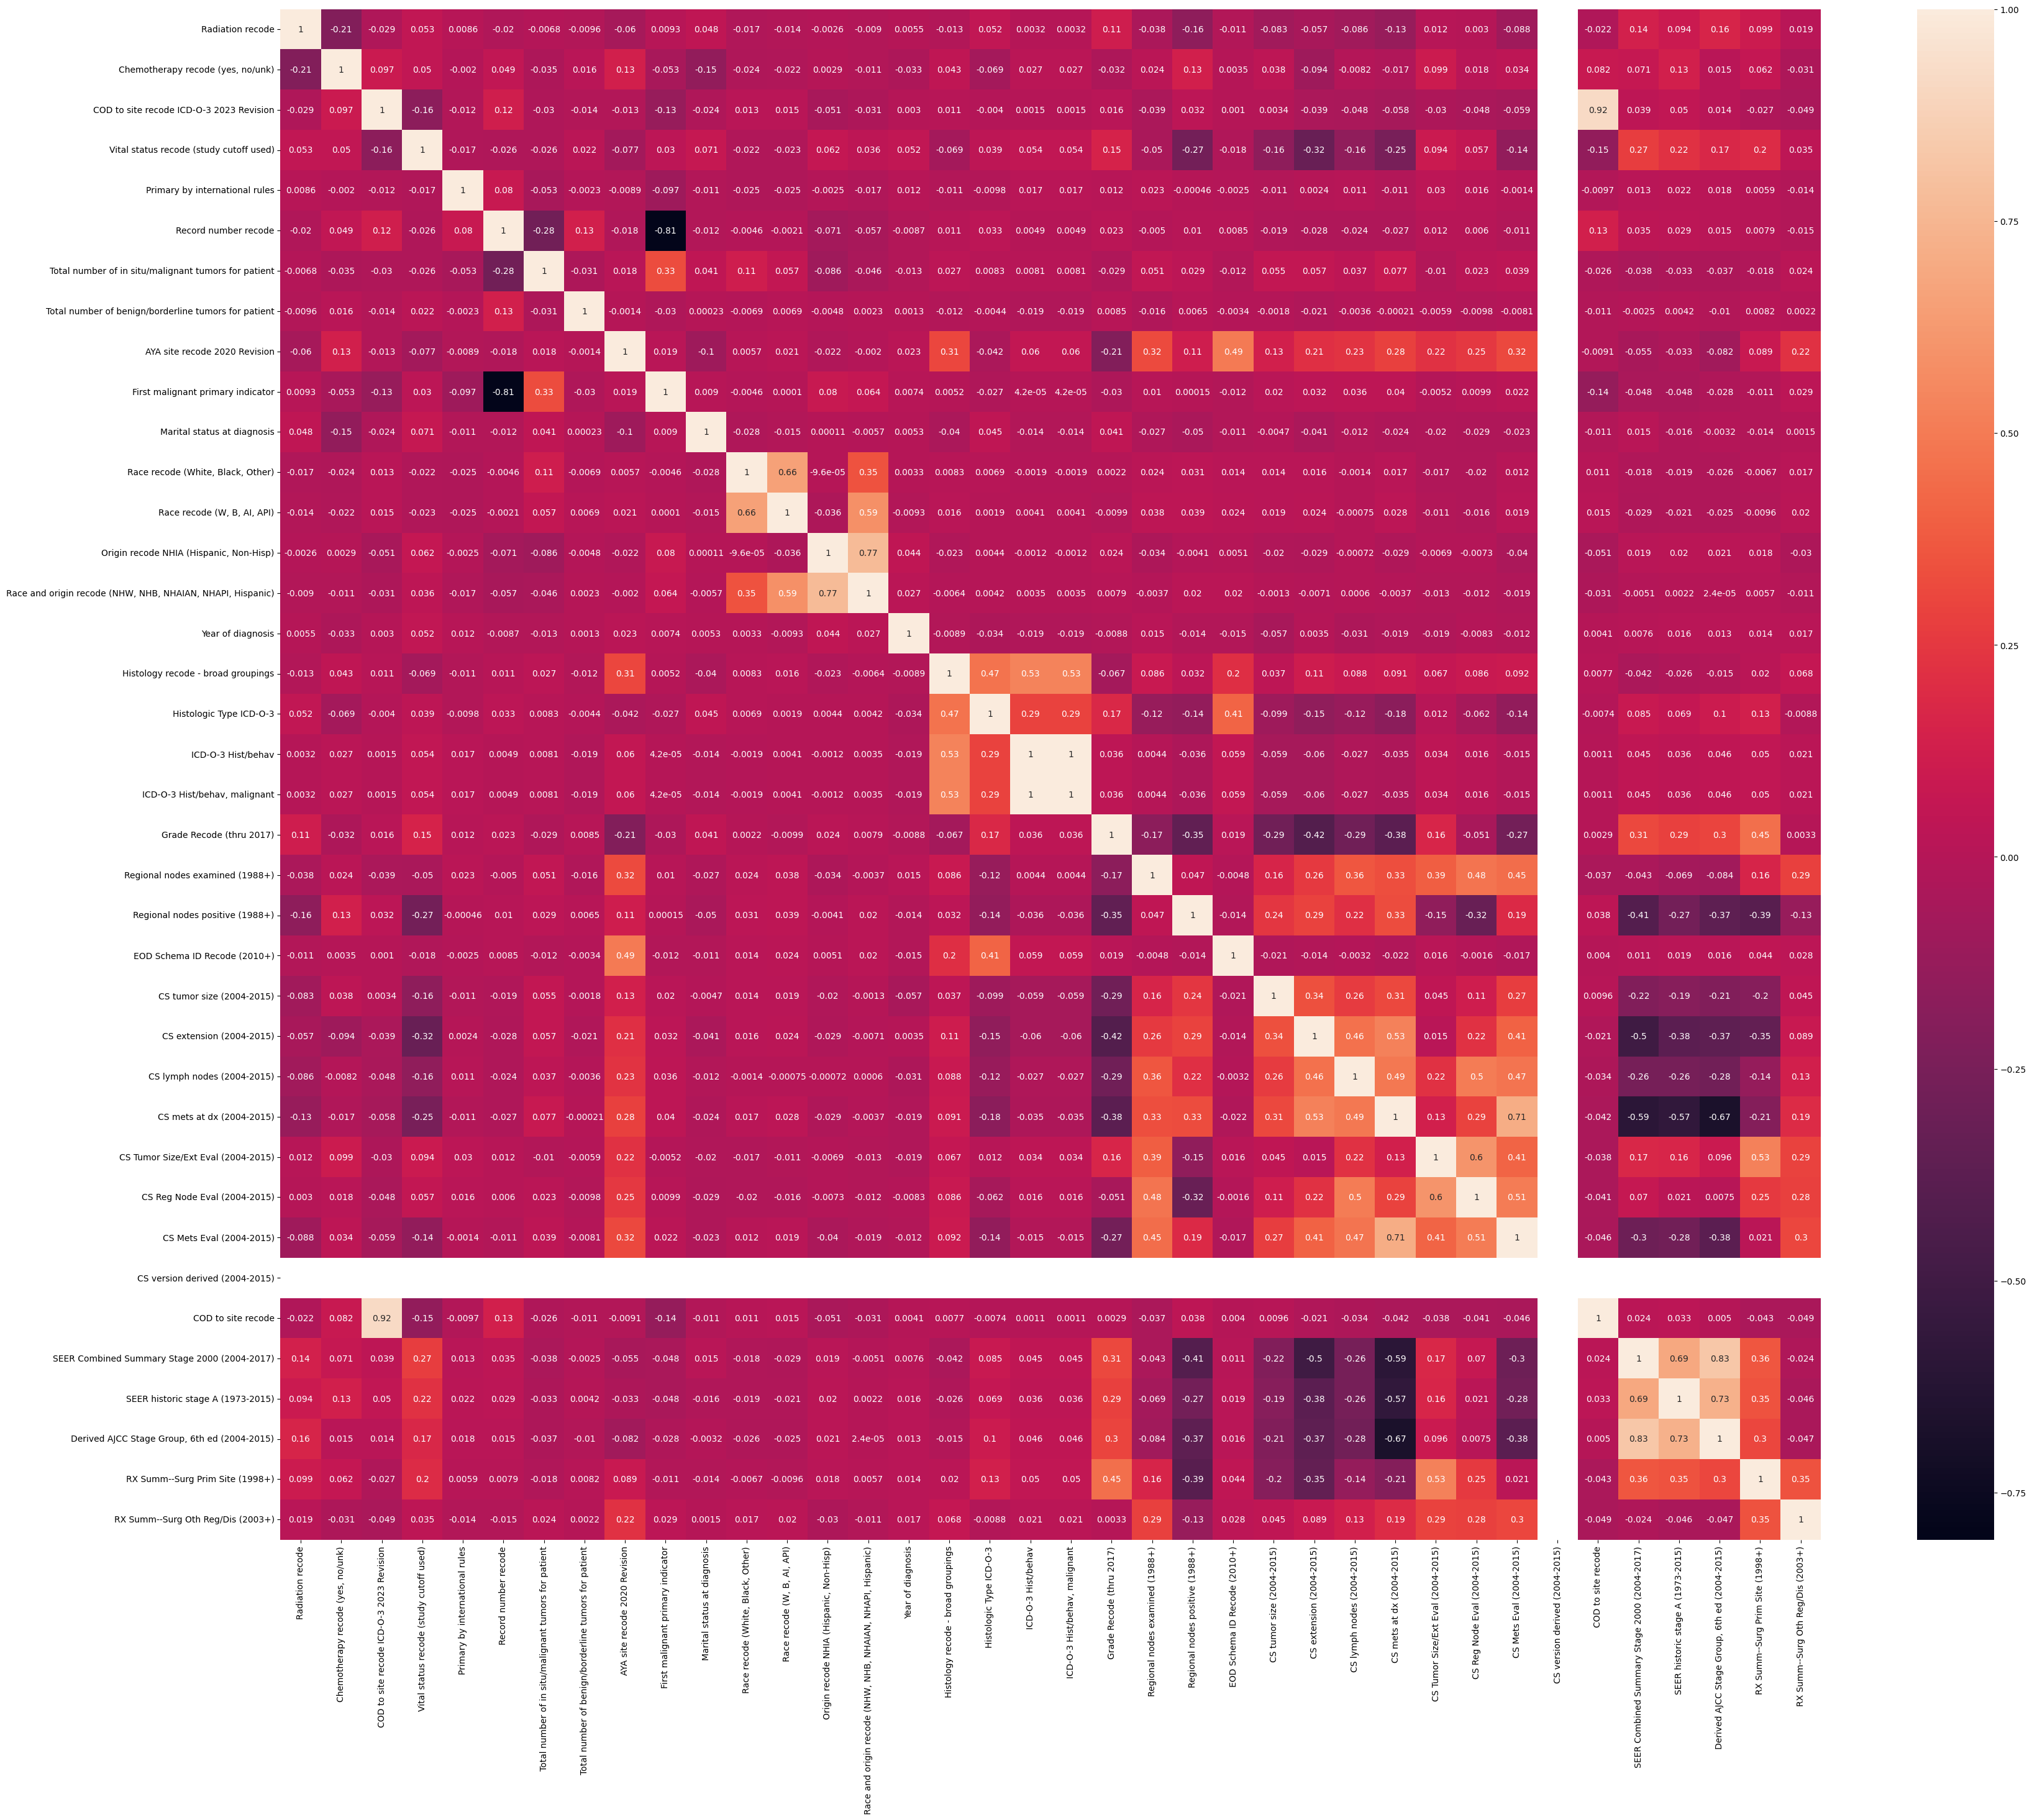

In [33]:
#Showing all the correlations for the targeted column
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(40, 32))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.show()


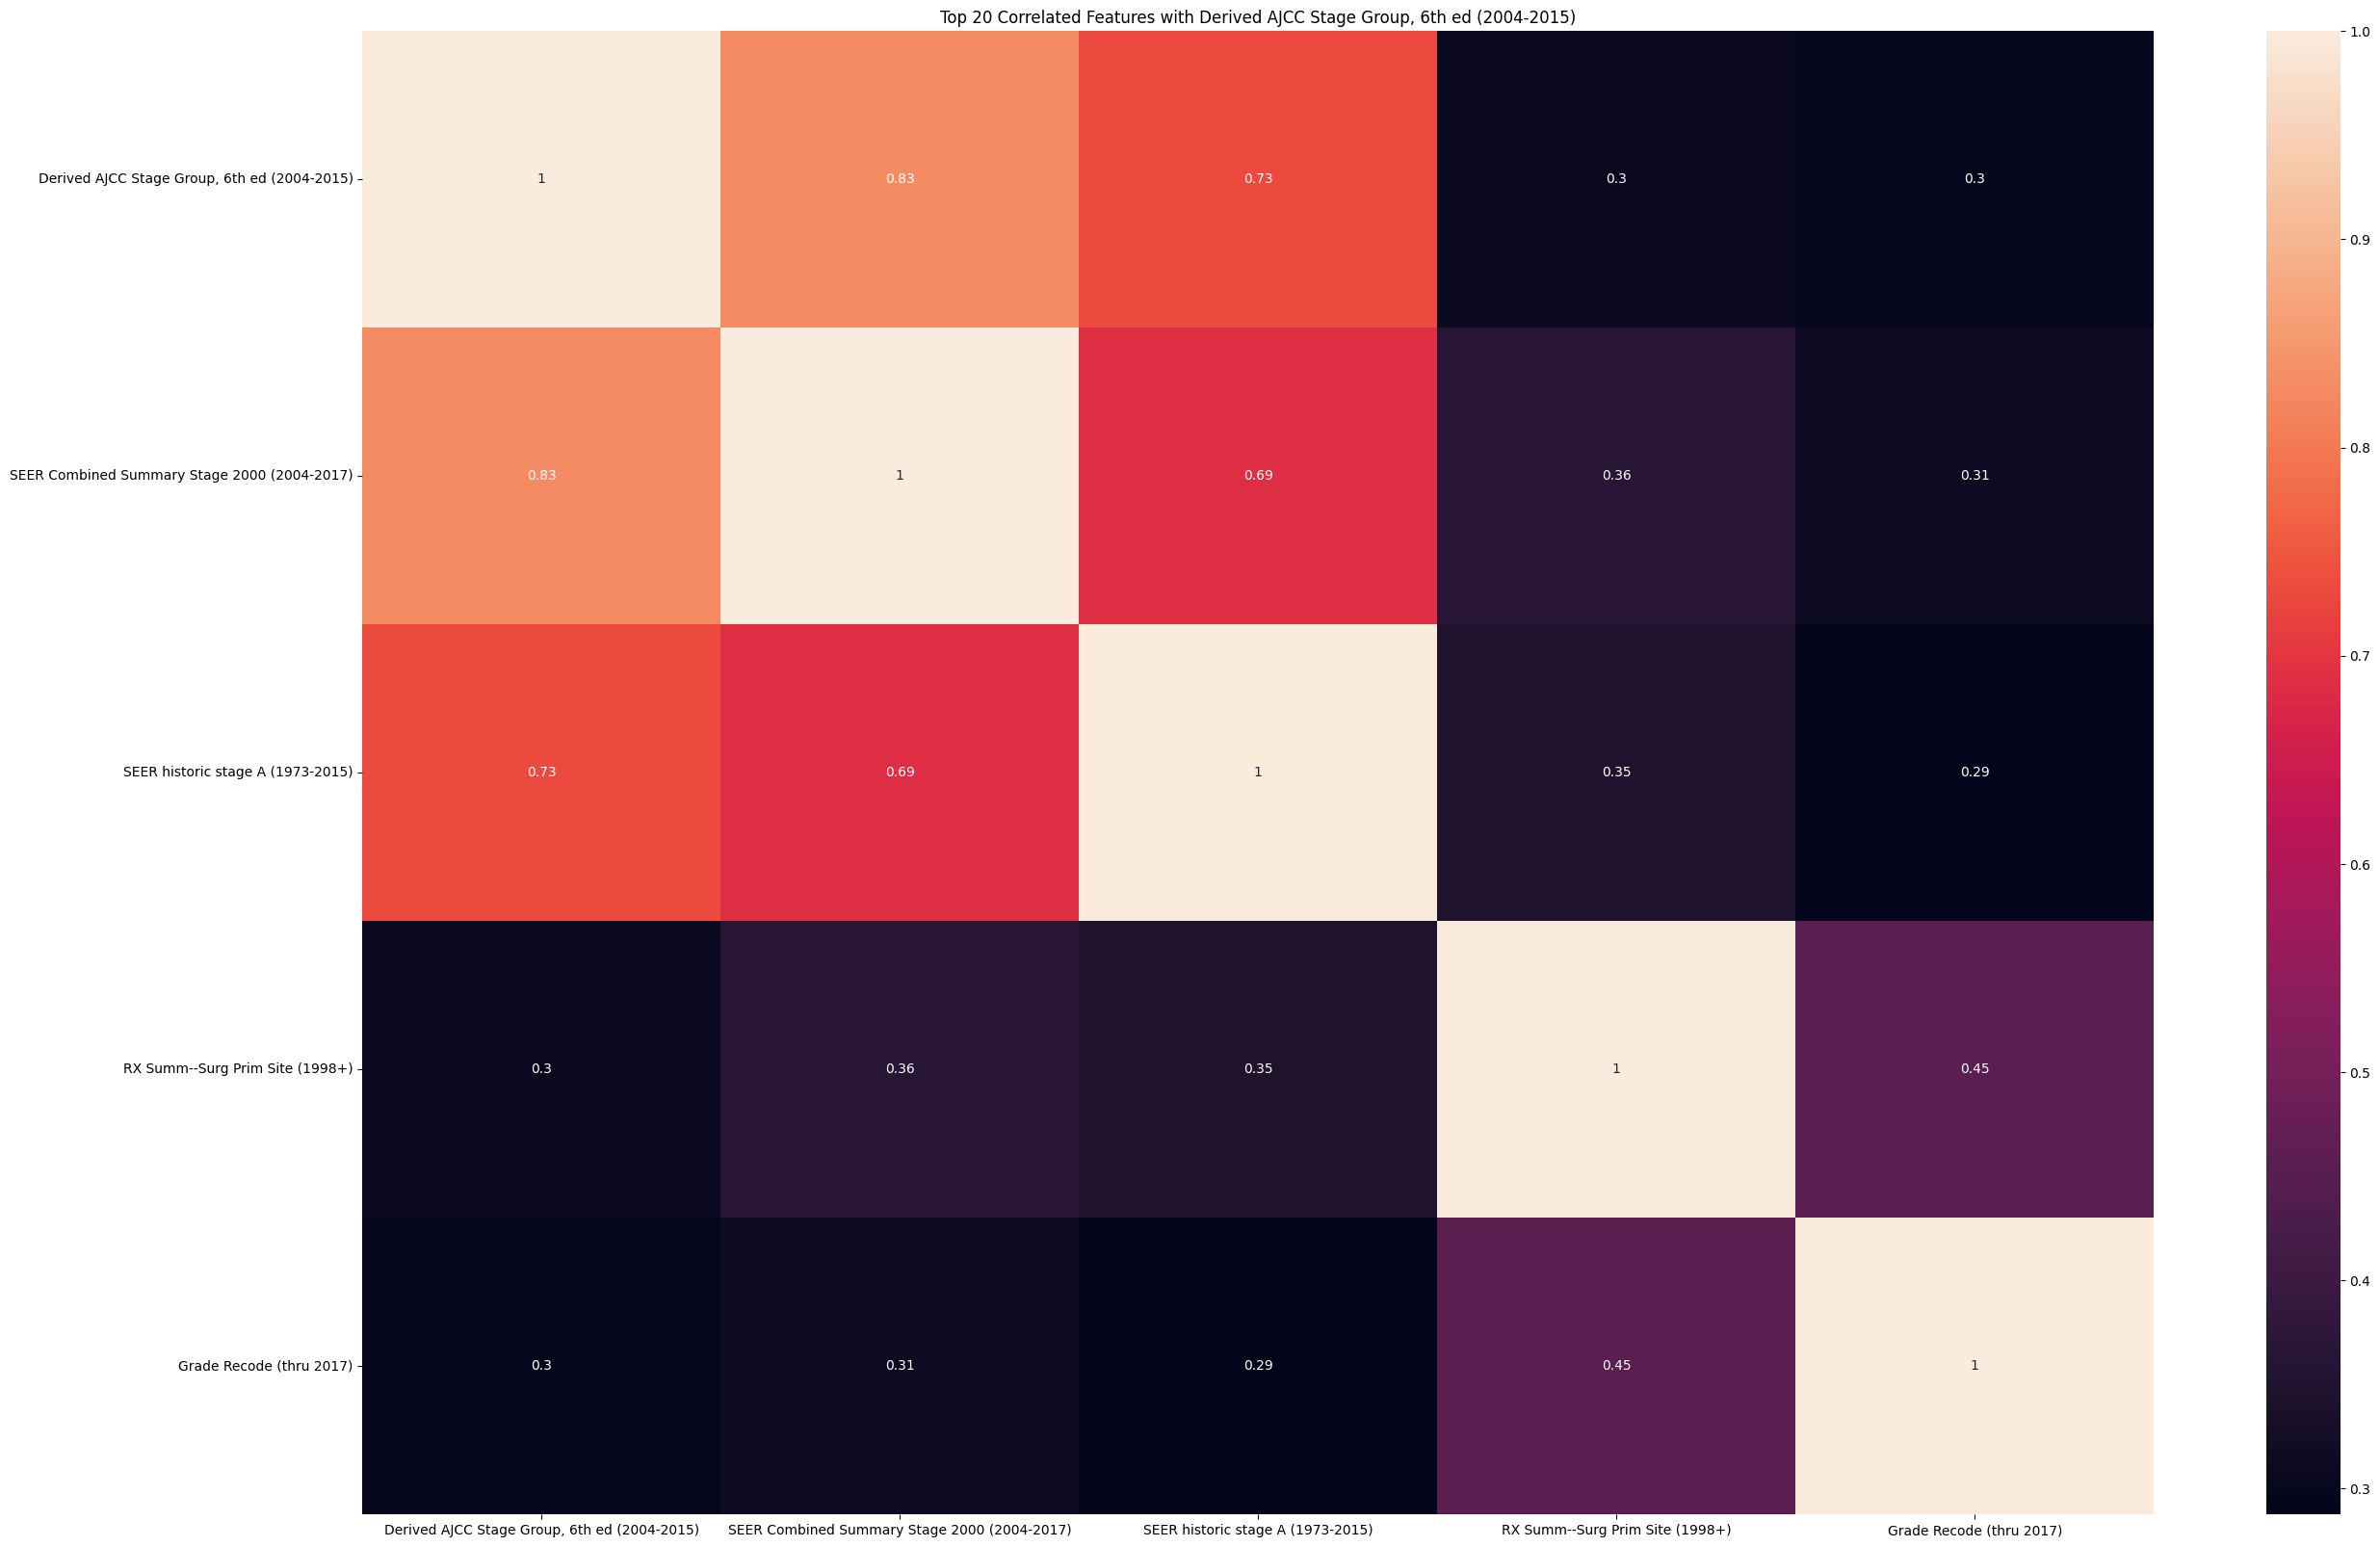

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Showing the top 10 most correlated columns
top_correlated_columns = correlations[correlations >= 0.0].head(5).index

# Create a heatmap of the correlations
plt.figure(figsize=(30, 20))
sns.heatmap(df[top_correlated_columns].corr(), annot=True)
plt.title('Top 20 Correlated Features with Derived AJCC Stage Group, 6th ed (2004-2015)')
plt.show()


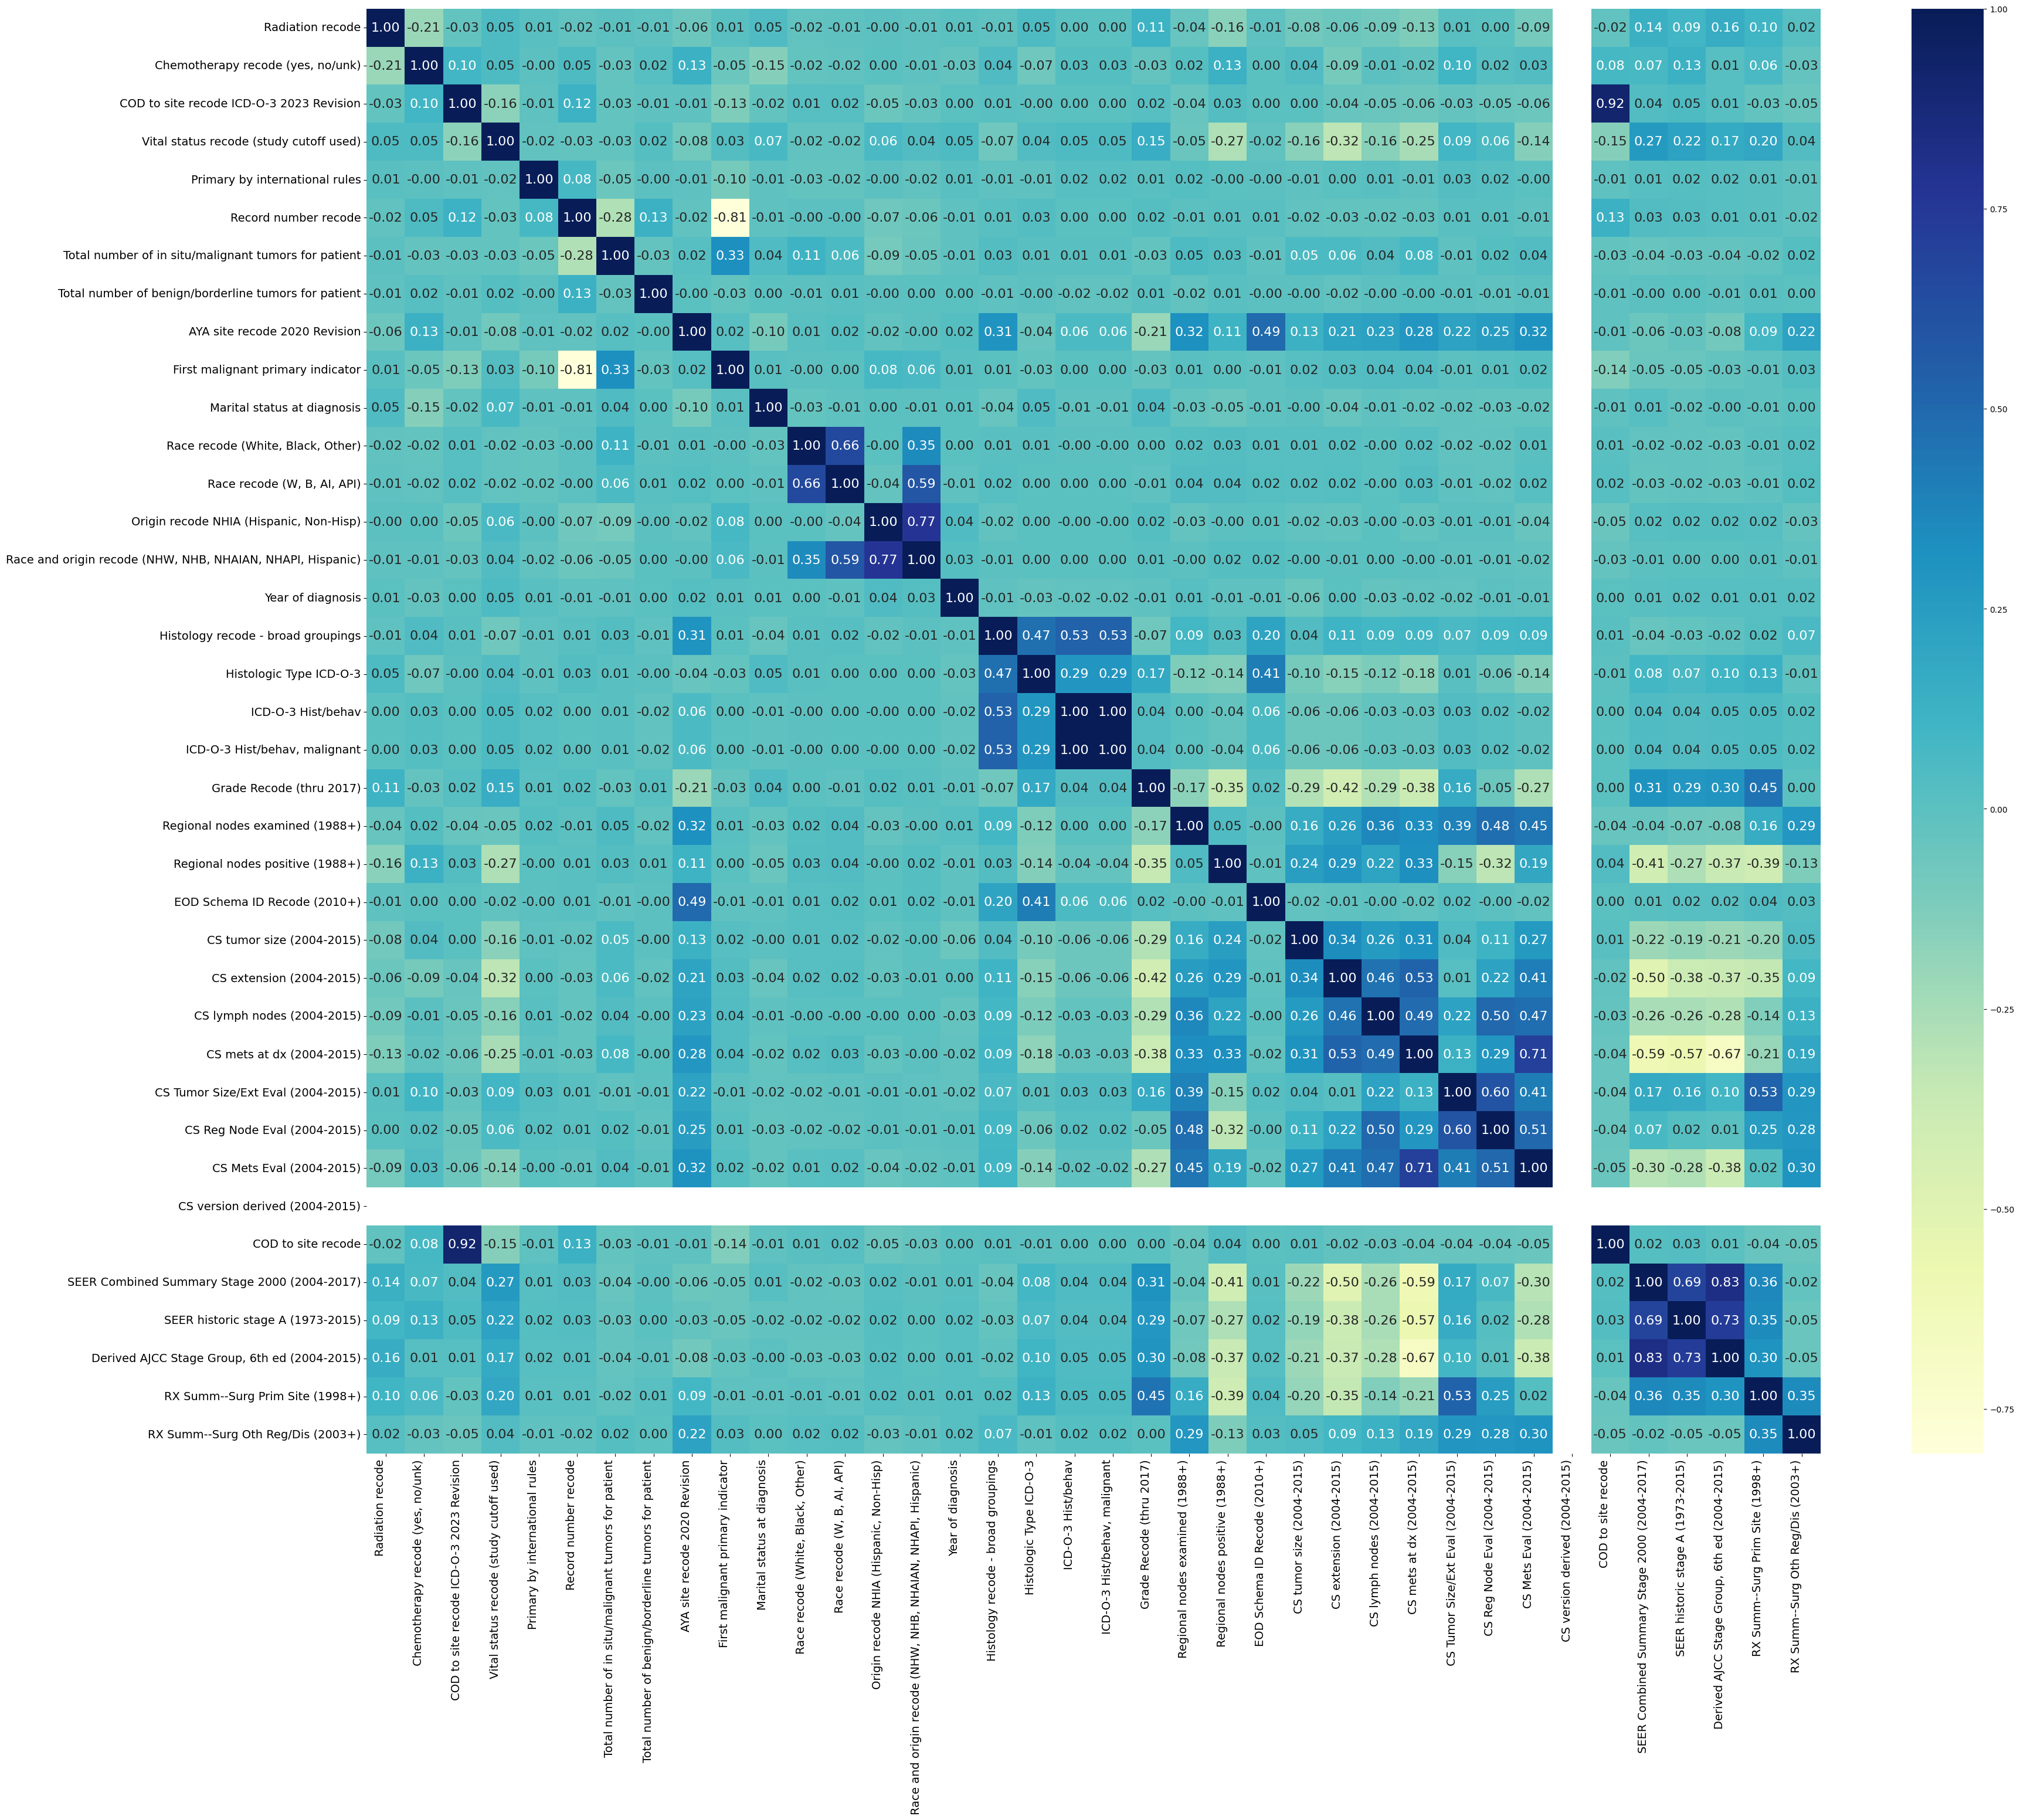

In [35]:
# prompt: make the text more large inside the graph of correlation along with the columns names, the below column name should be varticall

# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(40, 32))

# Create a heatmap of the correlation matrix with larger text and vertical column names
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 16}, fmt=".2f", cmap="YlGnBu")
plt.xticks(rotation=90, ha='right', fontsize=14)  # Rotate x-axis labels and increase font size
plt.yticks(fontsize=14)  # Increase font size of y-axis labels

plt.show()


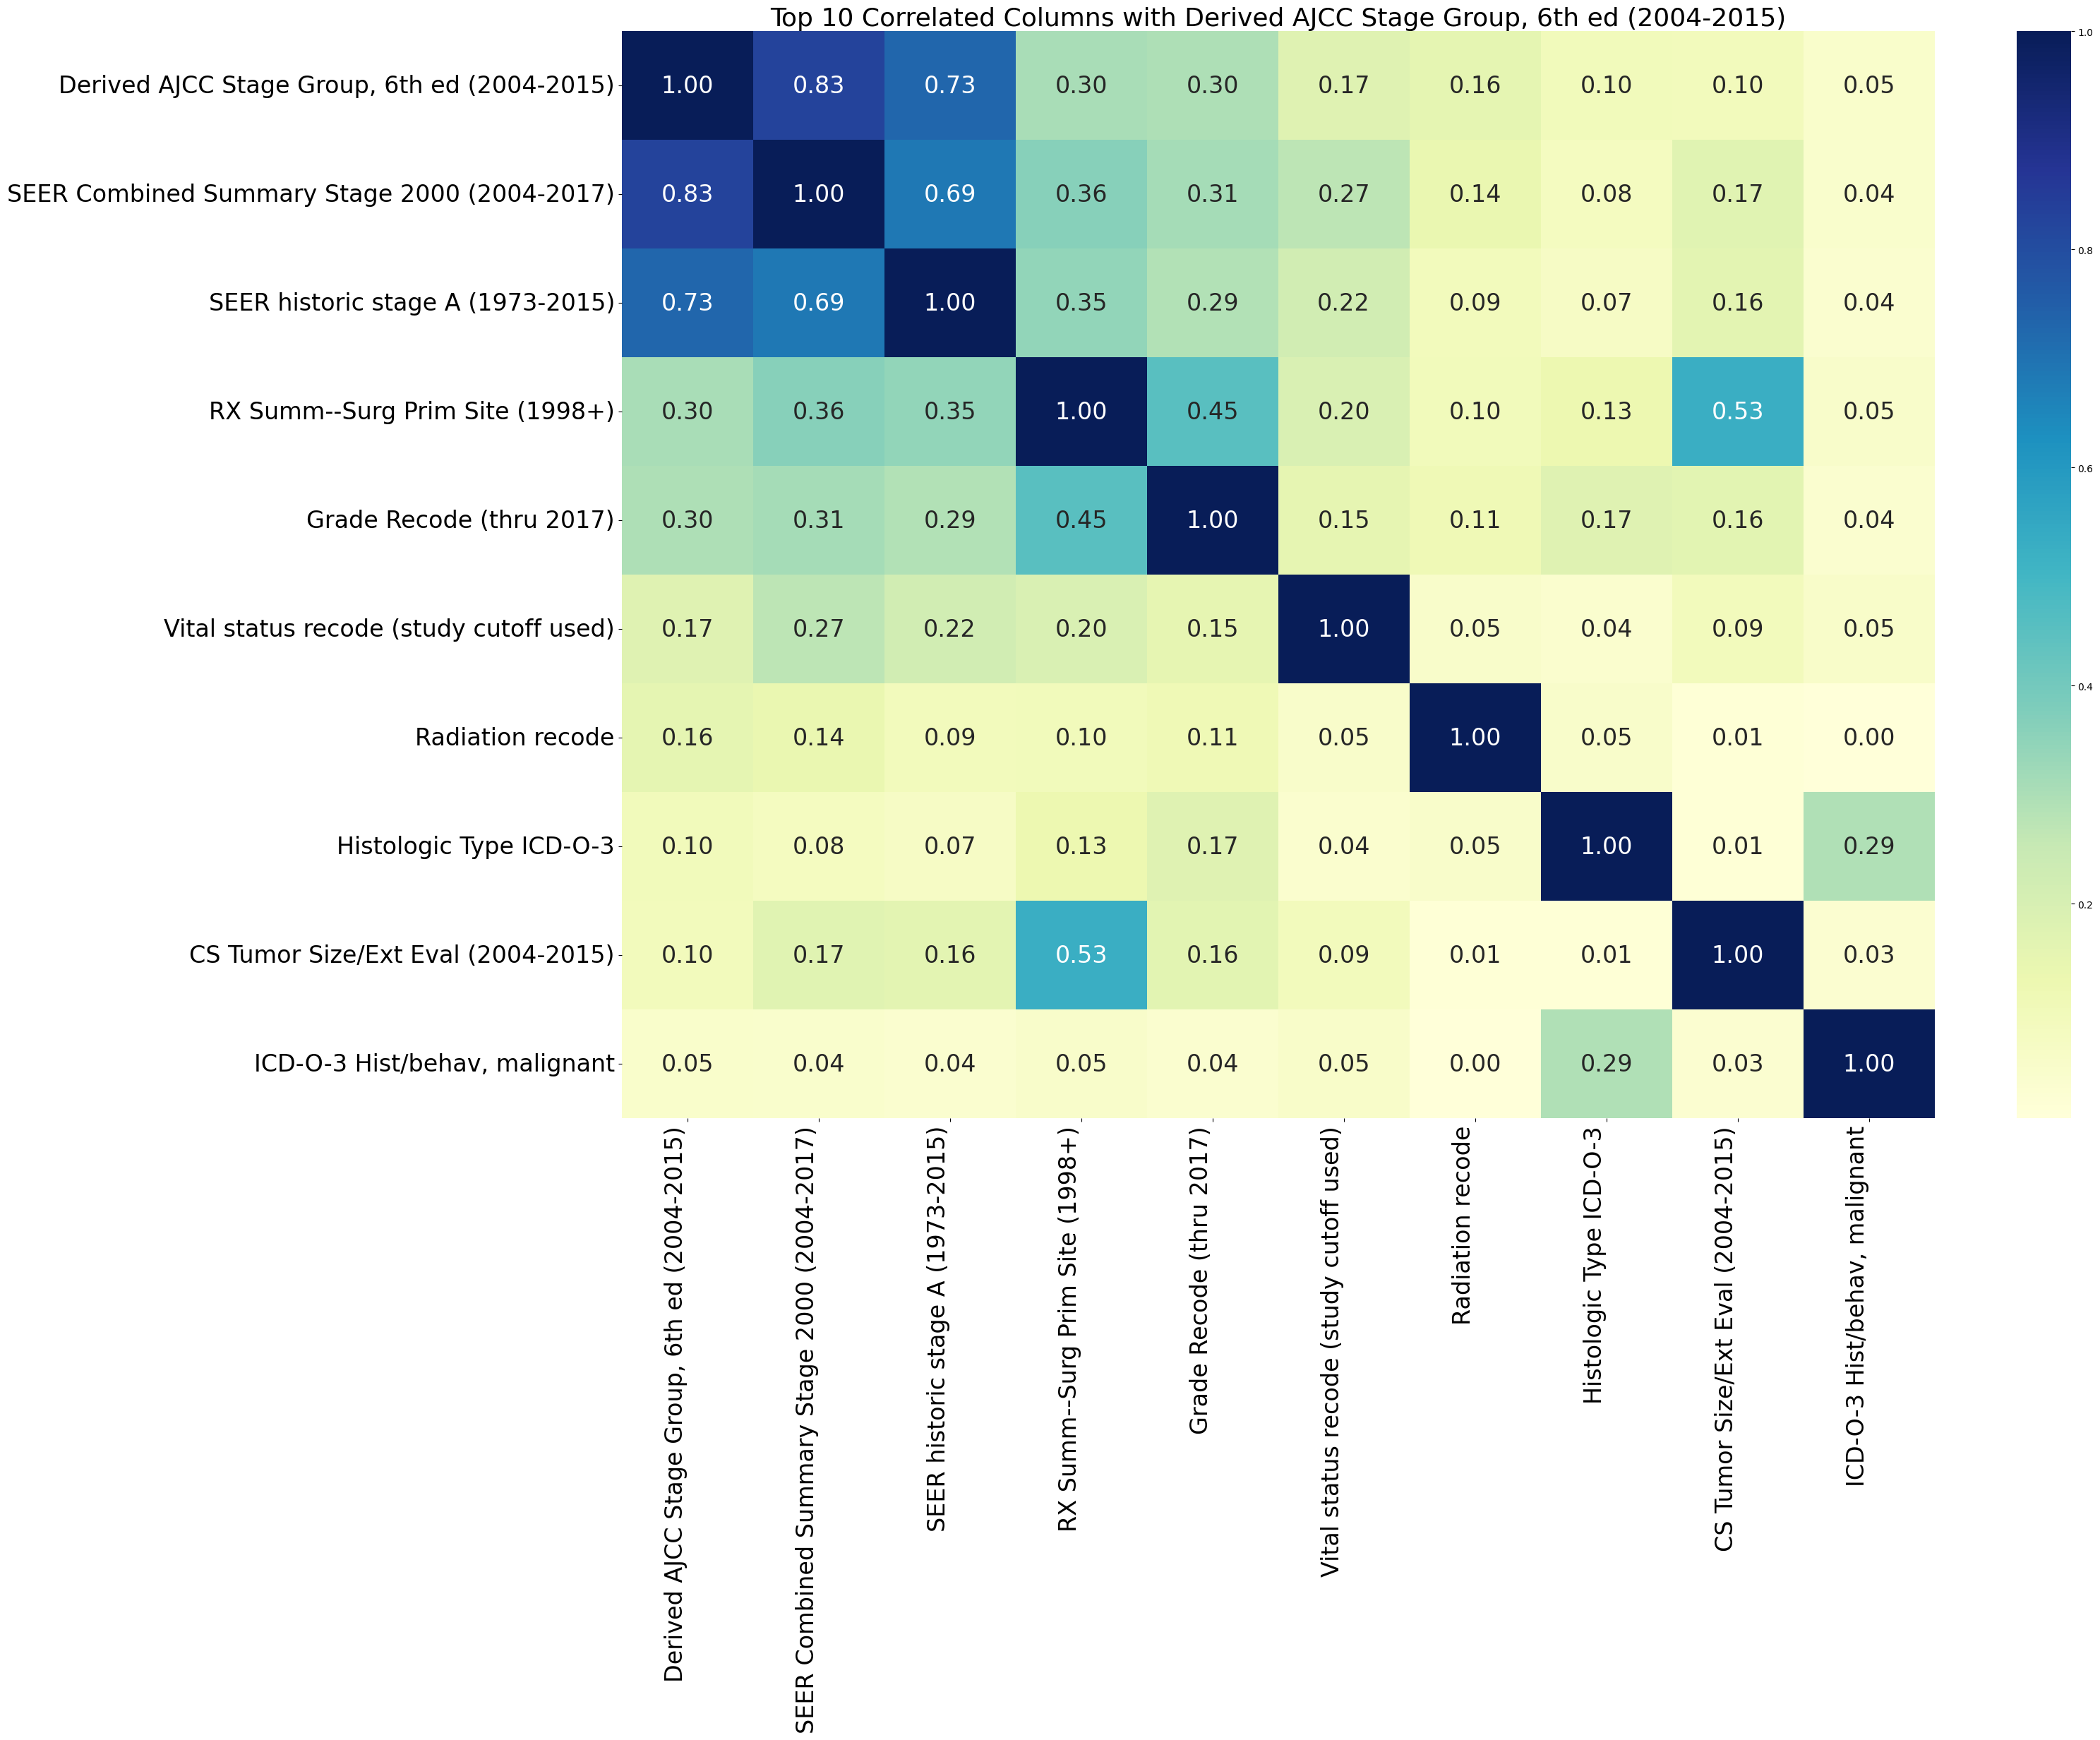

In [36]:
# prompt: do the same graph but with 10 columns only, color will also be same

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Select the desired column
target_column = 'Derived AJCC Stage Group, 6th ed (2004-2015)'

# Get the correlations of the target column with other columns
correlations = correlation_matrix[target_column].sort_values(ascending=False)

# Showing the top 10 most correlated columns
top_correlated_columns = correlations[correlations >= 0.0].head(10).index

# Create a heatmap of the correlations
plt.figure(figsize=(30, 20))
sns.heatmap(df[top_correlated_columns].corr(), annot=True, annot_kws={"size": 24}, fmt=".2f", cmap="YlGnBu")
plt.title('Top 10 Correlated Columns with Derived AJCC Stage Group, 6th ed (2004-2015)',fontsize=26)
plt.xticks(rotation=90, ha='right', fontsize=24)
plt.yticks(fontsize=24)
plt.show()


In [37]:
#The top 25 corelated columns

top_correlated_columns = correlations.head(25).index.tolist()
print(top_correlated_columns)

['Derived AJCC Stage Group, 6th ed (2004-2015)', 'SEER Combined Summary Stage 2000 (2004-2017)', 'SEER historic stage A (1973-2015)', 'RX Summ--Surg Prim Site (1998+)', 'Grade Recode (thru 2017)', 'Vital status recode (study cutoff used)', 'Radiation recode', 'Histologic Type ICD-O-3', 'CS Tumor Size/Ext Eval (2004-2015)', 'ICD-O-3 Hist/behav, malignant', 'ICD-O-3 Hist/behav', 'Origin recode NHIA (Hispanic, Non-Hisp)', 'Primary by international rules', 'EOD Schema ID Recode (2010+)', 'Record number recode', 'Chemotherapy recode (yes, no/unk)', 'COD to site recode ICD-O-3 2023 Revision', 'Year of diagnosis', 'CS Reg Node Eval (2004-2015)', 'COD to site recode', 'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)', 'Marital status at diagnosis', 'Total number of benign/borderline tumors for patient', 'Histology recode - broad groupings', 'Race recode (W, B, AI, API)']


#Combining Features

top_correlated_columns, selected_features_chi2, selected_features_anova,selected_features_ExtraTree

In [38]:
#Common features among all of these
common_features =  set(top_correlated_columns) & set(selected_features_chi2) & set(selected_features_anova) & set(selected_features_ExtraTree)
print(common_features)


{'SEER Combined Summary Stage 2000 (2004-2017)', 'Histologic Type ICD-O-3', 'ICD-O-3 Hist/behav', 'CS Tumor Size/Ext Eval (2004-2015)', 'Vital status recode (study cutoff used)', 'SEER historic stage A (1973-2015)', 'COD to site recode ICD-O-3 2023 Revision', 'Radiation recode', 'Chemotherapy recode (yes, no/unk)', 'Grade Recode (thru 2017)', 'ICD-O-3 Hist/behav, malignant', 'CS Reg Node Eval (2004-2015)', 'RX Summ--Surg Prim Site (1998+)', 'COD to site recode'}


In [39]:
#converting the common Featues set to list
common_features = list(common_features)
print(common_features)

['SEER Combined Summary Stage 2000 (2004-2017)', 'Histologic Type ICD-O-3', 'ICD-O-3 Hist/behav', 'CS Tumor Size/Ext Eval (2004-2015)', 'Vital status recode (study cutoff used)', 'SEER historic stage A (1973-2015)', 'COD to site recode ICD-O-3 2023 Revision', 'Radiation recode', 'Chemotherapy recode (yes, no/unk)', 'Grade Recode (thru 2017)', 'ICD-O-3 Hist/behav, malignant', 'CS Reg Node Eval (2004-2015)', 'RX Summ--Surg Prim Site (1998+)', 'COD to site recode']


In [40]:
common_features.append('Derived AJCC Stage Group, 6th ed (2004-2015)')
common_features

['SEER Combined Summary Stage 2000 (2004-2017)',
 'Histologic Type ICD-O-3',
 'ICD-O-3 Hist/behav',
 'CS Tumor Size/Ext Eval (2004-2015)',
 'Vital status recode (study cutoff used)',
 'SEER historic stage A (1973-2015)',
 'COD to site recode ICD-O-3 2023 Revision',
 'Radiation recode',
 'Chemotherapy recode (yes, no/unk)',
 'Grade Recode (thru 2017)',
 'ICD-O-3 Hist/behav, malignant',
 'CS Reg Node Eval (2004-2015)',
 'RX Summ--Surg Prim Site (1998+)',
 'COD to site recode',
 'Derived AJCC Stage Group, 6th ed (2004-2015)']

In [41]:
df = df[common_features]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6156 entries, 1 to 20406
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   SEER Combined Summary Stage 2000 (2004-2017)  6156 non-null   int64  
 1   Histologic Type ICD-O-3                       6156 non-null   int64  
 2   ICD-O-3 Hist/behav                            6156 non-null   int64  
 3   CS Tumor Size/Ext Eval (2004-2015)            6156 non-null   float64
 4   Vital status recode (study cutoff used)       6156 non-null   int64  
 5   SEER historic stage A (1973-2015)             6156 non-null   int64  
 6   COD to site recode ICD-O-3 2023 Revision      6156 non-null   int64  
 7   Radiation recode                              6156 non-null   int64  
 8   Chemotherapy recode (yes, no/unk)             6156 non-null   int64  
 9   Grade Recode (thru 2017)                      6156 non-null   int64

#Smotting

In [43]:
# prompt: unique value count of a ccolumn

df['Derived AJCC Stage Group, 6th ed (2004-2015)'].value_counts()


Derived AJCC Stage Group, 6th ed (2004-2015)
0    2373
2    1025
6     785
5     759
4     551
1     467
3     147
7      49
Name: count, dtype: int64

In [44]:
#smotting the ccolumn 'Derived AJCC Stage Group, 6th ed (2004-2015)'

import pandas as pd
from imblearn.over_sampling import SMOTE

# Separate the target column from the rest of the data
target_column = 'Derived AJCC Stage Group, 6th ed (2004-2015)'
Xx = df.drop(columns=['Derived AJCC Stage Group, 6th ed (2004-2015)'])
yy = df['Derived AJCC Stage Group, 6th ed (2004-2015)']

# Instantiate the SMOTE model
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit the SMOTE model to the data
X_resampled, y_resampled = smote.fit_resample(Xx, yy)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=Xx.columns)
df_resampled[target_column] = y_resampled

# Display the resampled DataFrame
print(df_resampled.head())

   SEER Combined Summary Stage 2000 (2004-2017)  Histologic Type ICD-O-3  \
0                                             0                     8140   
1                                             1                     8010   
2                                             2                     8140   
3                                             0                     8140   
4                                             2                     8140   

   ICD-O-3 Hist/behav  CS Tumor Size/Ext Eval (2004-2015)  \
0                   0                                 0.0   
1                   1                                 9.0   
2                   0                                 3.0   
3                   0                                 9.0   
4                   0                                 3.0   

   Vital status recode (study cutoff used)  SEER historic stage A (1973-2015)  \
0                                        0                                  0   
1             

In [45]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18984 entries, 0 to 18983
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   SEER Combined Summary Stage 2000 (2004-2017)  18984 non-null  int64  
 1   Histologic Type ICD-O-3                       18984 non-null  int64  
 2   ICD-O-3 Hist/behav                            18984 non-null  int64  
 3   CS Tumor Size/Ext Eval (2004-2015)            18984 non-null  float64
 4   Vital status recode (study cutoff used)       18984 non-null  int64  
 5   SEER historic stage A (1973-2015)             18984 non-null  int64  
 6   COD to site recode ICD-O-3 2023 Revision      18984 non-null  int64  
 7   Radiation recode                              18984 non-null  int64  
 8   Chemotherapy recode (yes, no/unk)             18984 non-null  int64  
 9   Grade Recode (thru 2017)                      18984 non-null 

In [46]:
print(df_resampled['Derived AJCC Stage Group, 6th ed (2004-2015)'].value_counts())


Derived AJCC Stage Group, 6th ed (2004-2015)
0    2373
1    2373
2    2373
3    2373
4    2373
5    2373
6    2373
7    2373
Name: count, dtype: int64


In [47]:
df = df_resampled

#Splitting The Dataset into Train and test

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split

features = df.drop(['Derived AJCC Stage Group, 6th ed (2004-2015)'], axis=1)
target = df['Derived AJCC Stage Group, 6th ed (2004-2015)']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Mscaler = MinMaxScaler()
Sscaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_mms  = Mscaler.fit_transform(X_train)
X_test_mms  = Mscaler.transform(X_test)

X_train_sc = Sscaler.fit_transform(X_train)
X_test_sc  = Sscaler.transform(X_test)

#Algorithms, Accuracy, Confusion Matrix


In [50]:
#calculate time from here
import time
start_time = time.time()

In [51]:
from sklearn.metrics import accuracy_score, classification_report


#Support Vector Machine (12%)

In [52]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.1243
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       459
           1       0.13      0.91      0.23       474
           2       0.00      0.00      0.00       499
           3       0.08      0.08      0.08       439
           4       0.00      0.00      0.00       508
           5       0.00      0.00      0.00       476
           6       0.16      0.01      0.01       449
           7       0.00      0.00      0.00       493

    accuracy                           0.12      3797
   macro avg       0.05      0.13      0.04      3797
weighted avg       0.04      0.12      0.04      3797



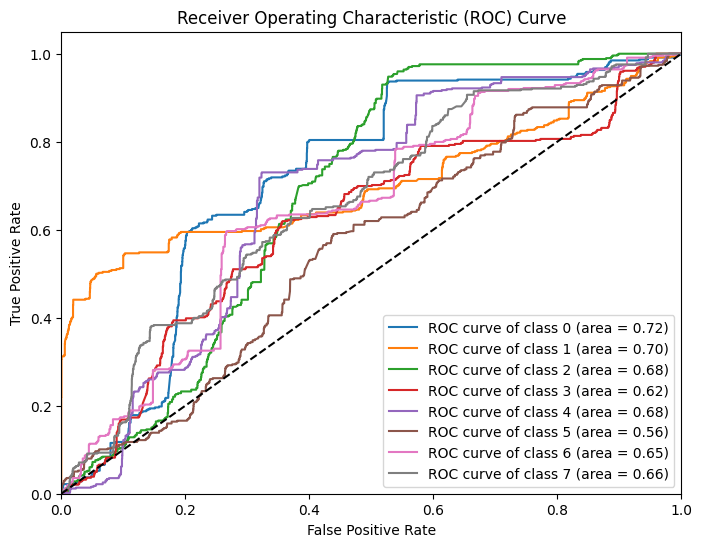

In [53]:
# prompt: generate a roc curve for this model

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = model.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


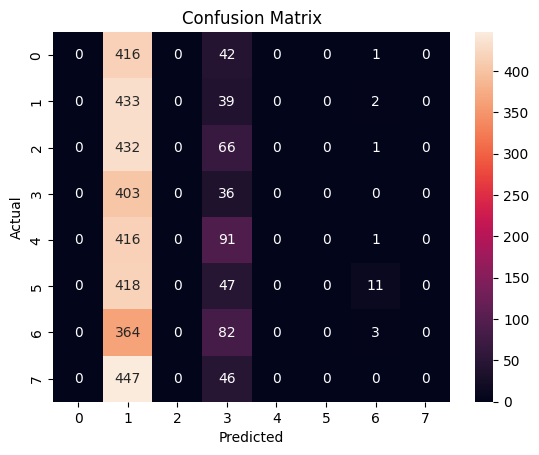

In [54]:
# prompt: give me visual confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d")

# Set labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


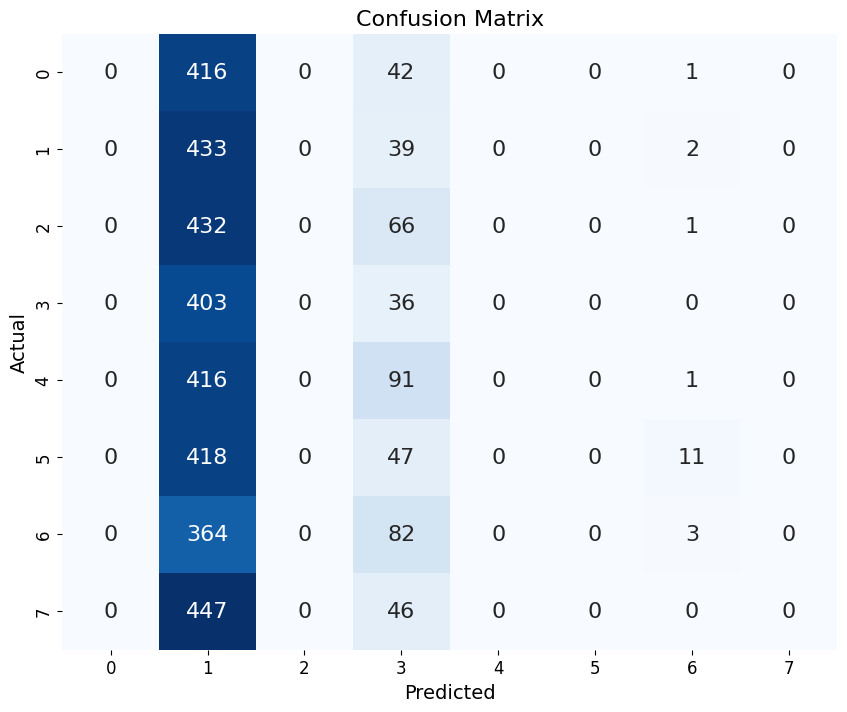

In [55]:
# prompt: generate the confusion matrix visually beautiful

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 16})  # Use a visually appealing colormap and larger font size for annotations
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [56]:
# prompt: give me curve of confisuion matrix
"""
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the percentage of correct predictions for each class
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

ax.set(
    title="Confusion Matrix",
    xlabel="Predicted label",
    ylabel="True label",
    xticks=np.arange(n_classes),
    yticks=np.arange(n_classes),
    xticklabels=np.arange(n_classes),
    yticklabels=np.arange(n_classes),
)

# Label each cell with the corresponding value
for (i, j), z in np.ndenumerate(cm_norm):
    ax.text(j, i, f'{z * 100:.1f}%', ha='center', va='center', fontsize=10)

# Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=45)

# Display the plot
plt.show()

"""


'\n# Get the confusion matrix\ncm = confusion_matrix(y_test, y_pred)\n\n# Calculate the percentage of correct predictions for each class\ncm_norm = cm.astype(\'float\') / cm.sum(axis=1)[:, np.newaxis]\n\n# Plot the confusion matrix\nn_classes = cm.shape[0]\n\nfig, ax = plt.subplots(figsize=(8, 8))\ncax = ax.matshow(cm, cmap=plt.cm.Blues)\nfig.colorbar(cax)\n\nax.set(\n    title="Confusion Matrix",\n    xlabel="Predicted label",\n    ylabel="True label",\n    xticks=np.arange(n_classes),\n    yticks=np.arange(n_classes),\n    xticklabels=np.arange(n_classes),\n    yticklabels=np.arange(n_classes),\n)\n\n# Label each cell with the corresponding value\nfor (i, j), z in np.ndenumerate(cm_norm):\n    ax.text(j, i, f\'{z * 100:.1f}%\', ha=\'center\', va=\'center\', fontsize=10)\n\n# Rotate x-axis labels to prevent overlapping\nplt.xticks(rotation=45)\n\n# Display the plot\nplt.show() \n\n'

In [57]:
# prompt: do cross validation for the model

from sklearn.model_selection import cross_val_score

# Assuming 'model' is your SVC model, 'X_train' and 'y_train' are your training data
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.12343647 0.13133641 0.12973329 0.1247942  0.13269674]
Mean cross-validation score: 0.1283994222669152


In [58]:
model.fit(X_train_mms,y_train)
print(model.score(X_test_mms,y_test))
model.fit(X_train_sc,y_train)
print(model.score(X_test_sc,y_test))

0.8003687121411641
0.8180142217540163


#Logistic Regression (38%)

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.3713
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.37      0.45       459
           1       0.75      0.53      0.62       474
           2       0.29      0.34      0.31       499
           3       0.36      0.41      0.38       439
           4       0.30      0.24      0.27       508
           5       0.23      0.11      0.15       476
           6       0.28      0.60      0.38       449
           7       0.42      0.40      0.41       493

    accuracy                           0.37      3797
   macro avg       0.40      0.37      0.37      3797
weighted avg       0.40      0.37      0.37      3797



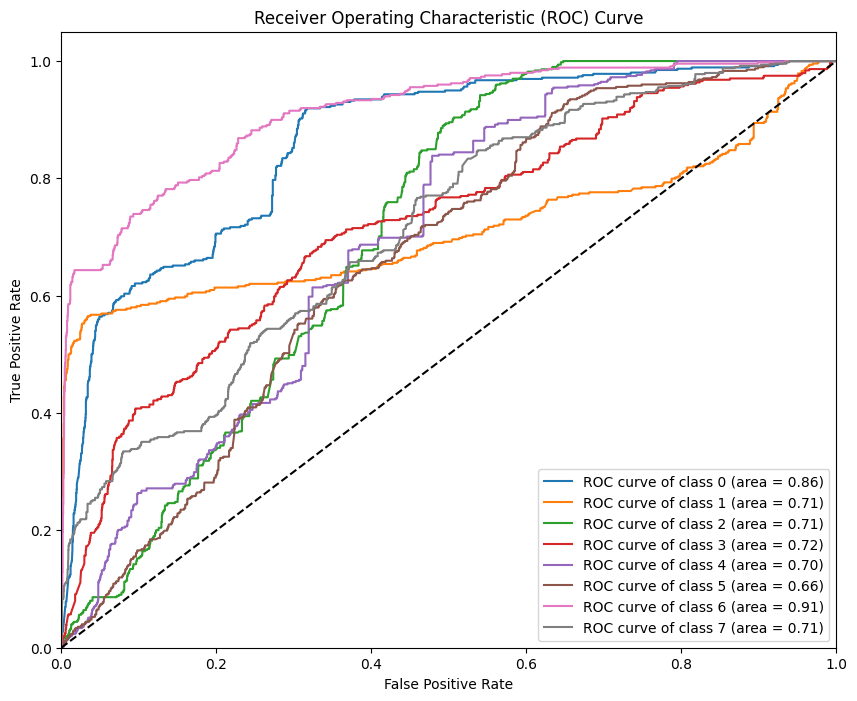

In [60]:
# prompt: generate a roc curve for this model

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Binarize the labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = model.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


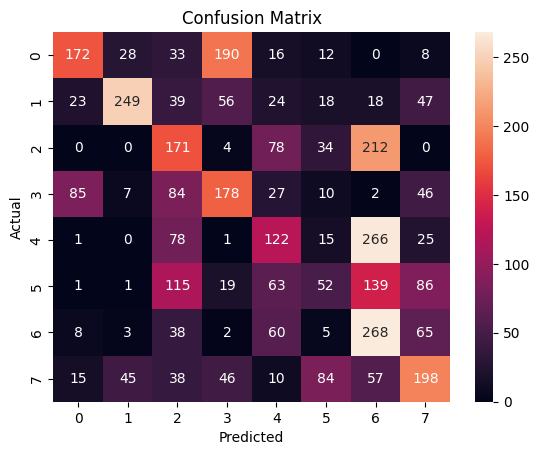

In [61]:
#confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d")

# Set labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


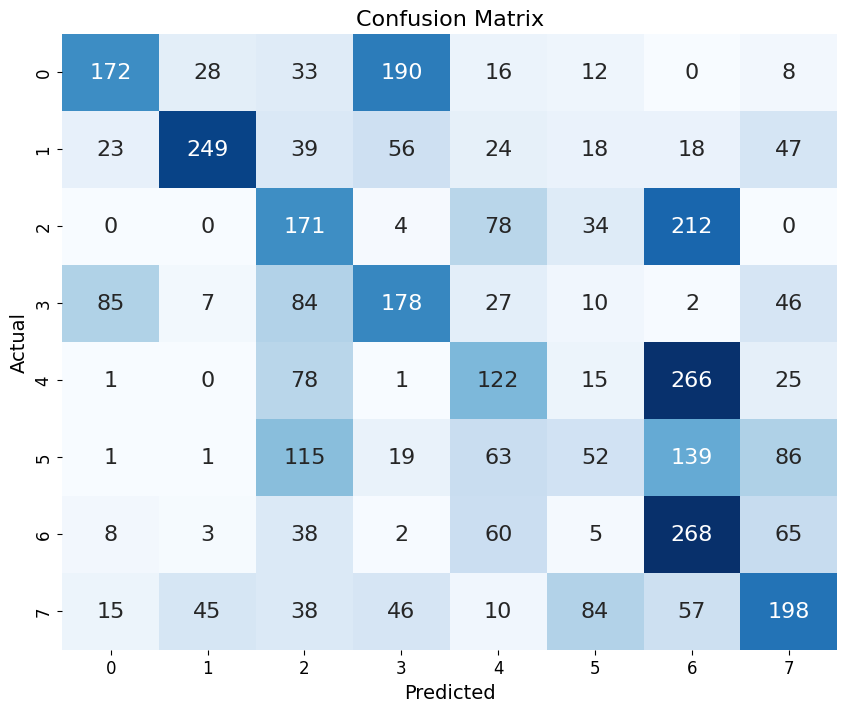

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 16})  # Use a visually appealing colormap and larger font size for annotations
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [63]:
# prompt: do cross validation for the model

# Assuming 'model' is your LogisticRegression model, 'X_train' and 'y_train' are your training data
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.36800527 0.35977617 0.34277247 0.36417517 0.3793217 ]
Mean cross-validation score: 0.36281015598056277


In [64]:
model.fit(X_train_mms,y_train)
print(model.score(X_test_mms,y_test))
model.fit(X_train_sc,y_train)
print(model.score(X_test_sc,y_test))

0.722939162496708
0.7289965762444035


#Ada Boost (41%)

In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming df is your DataFrame with features and labels
# Replace df with the actual name of your Data

# Create and train the AdaBoost classifier with Decision Tree as the base learner
base_classifier = DecisionTreeClassifier(max_depth=1)  # You can customize the base learner
model = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.4101
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       459
           1       0.50      0.00      0.01       474
           2       0.00      0.00      0.00       499
           3       0.42      1.00      0.59       439
           4       0.63      1.00      0.77       508
           5       0.25      0.95      0.40       476
           6       0.98      0.35      0.52       449
           7       0.00      0.00      0.00       493

    accuracy                           0.41      3797
   macro avg       0.35      0.41      0.29      3797
weighted avg       0.34      0.41      0.28      3797



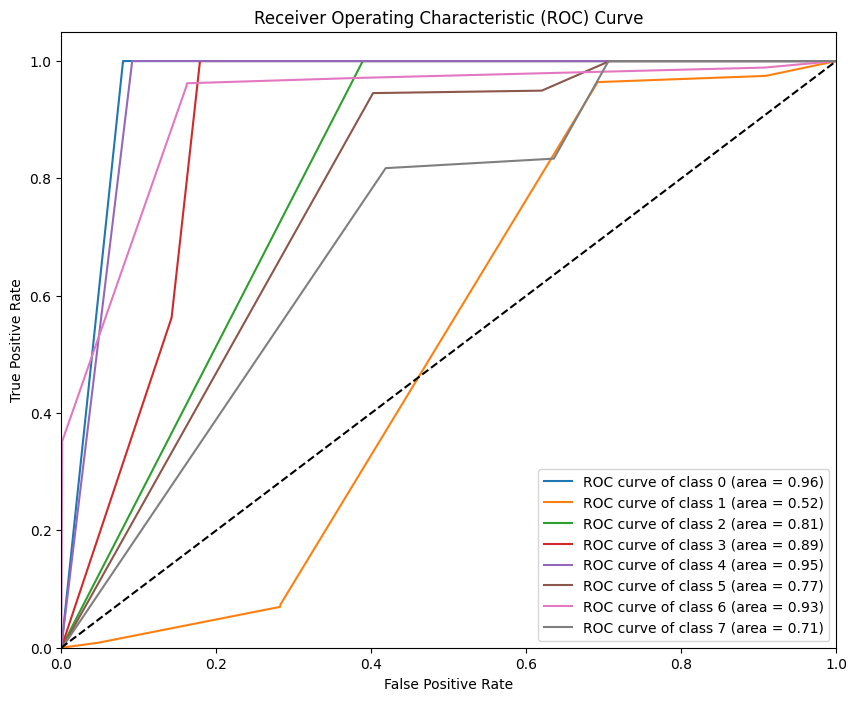

In [68]:
# prompt: solve the previous cell for ada bost algoritm


# Binarize the labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = model.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



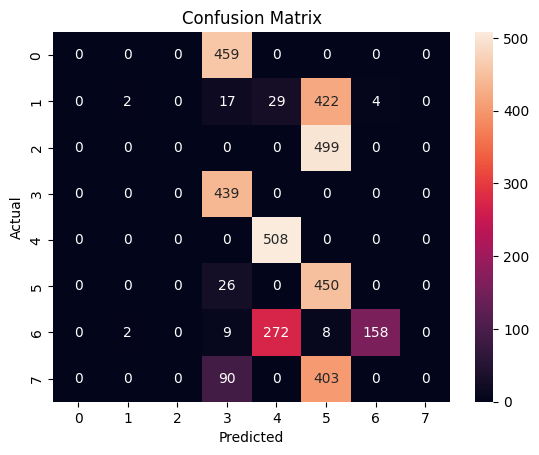

In [69]:
#confusion matrix


# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d")

# Set labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()



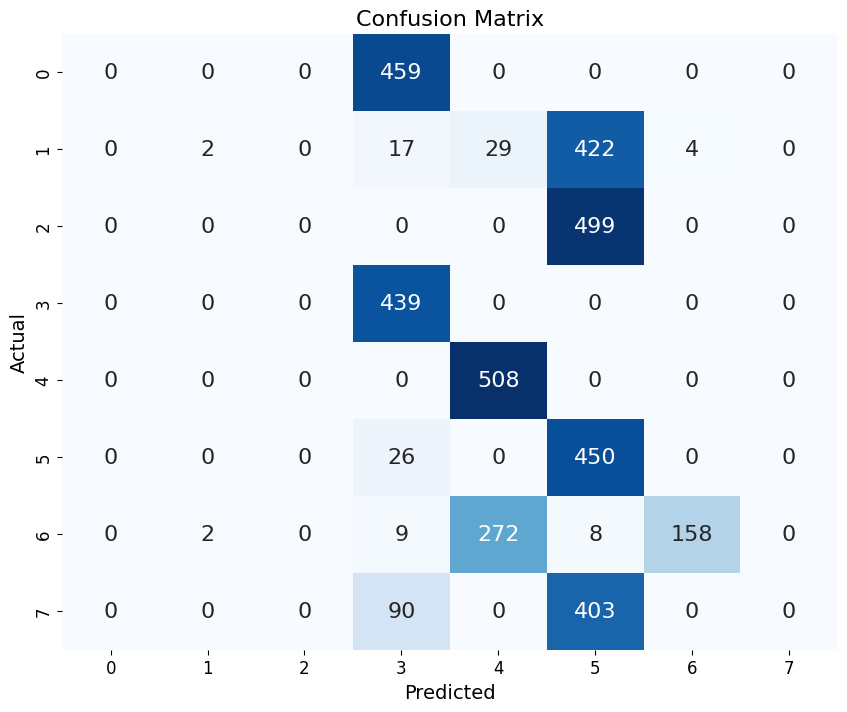

In [70]:

# Assuming y_test and y_pred are your true and predicted labels

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 16})  # Use a visually appealing colormap and larger font size for annotations
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [71]:

# Assuming 'model' is your AdaBoost model, 'X_train' and 'y_train' are your training data
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())



Cross-validation scores: [0.40322581 0.40882159 0.4007244  0.40730985 0.40434639]
Mean cross-validation score: 0.4048856076786563


In [72]:

model.fit(X_train_mms,y_train)
print(model.score(X_test_mms,y_test))
model.fit(X_train_sc,y_train)
print(model.score(X_test_sc,y_test))

0.41006057413747693
0.41006057413747693


#GaussianNB (72%)

In [73]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.7227
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.99      0.78       459
           1       0.94      0.68      0.79       474
           2       0.63      1.00      0.77       499
           3       0.65      0.42      0.51       439
           4       0.98      0.98      0.98       508
           5       0.55      0.23      0.32       476
           6       0.92      0.89      0.90       449
           7       0.53      0.56      0.54       493

    accuracy                           0.72      3797
   macro avg       0.73      0.72      0.70      3797
weighted avg       0.73      0.72      0.70      3797



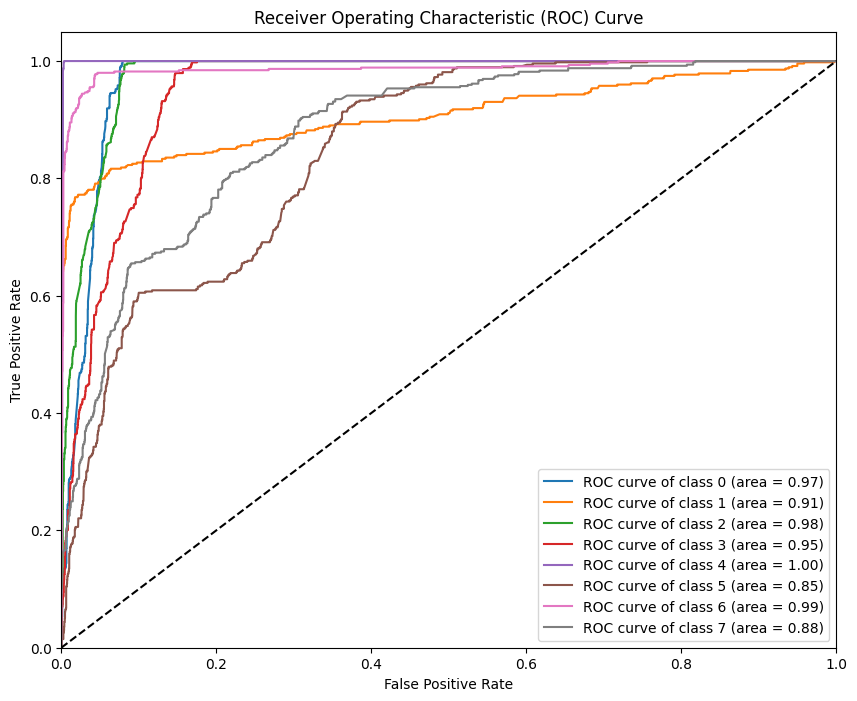

In [74]:
# prompt: generate a roc curve for the model

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


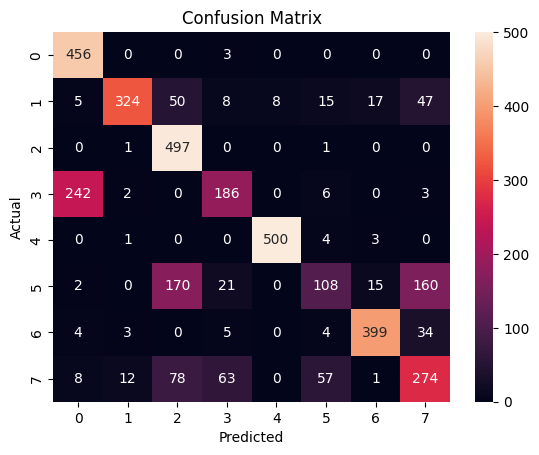

In [75]:
# prompt: give me visual confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d")

# Set labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


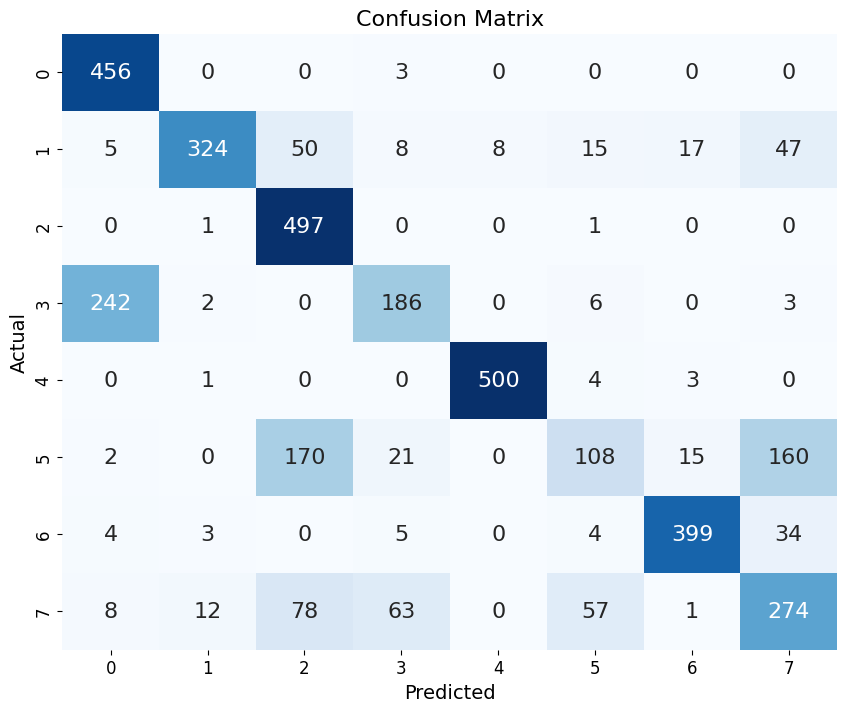

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 16})  # Use a visually appealing colormap and larger font size for annotations
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [77]:
# prompt: cross validation

from sklearn.model_selection import cross_val_score

# Assuming 'model' is your chosen model (e.g., LogisticRegression, SVC, etc.)
# and 'X_train' and 'y_train' are your training data

cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.72580645 0.71296906 0.72736253 0.71485018 0.72209417]
Mean cross-validation score: 0.7206164783990647


In [78]:
model.fit(X_train_mms,y_train)
print(model.score(X_test_mms,y_test))
model.fit(X_train_sc,y_train)
print(model.score(X_test_sc,y_test))

0.7200421385304188
0.720305504345536


#K neighbors Classifier (83%)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8364
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       459
           1       0.87      0.83      0.85       474
           2       0.74      0.78      0.76       499
           3       0.81      0.86      0.83       439
           4       0.90      0.93      0.91       508
           5       0.71      0.70      0.70       476
           6       0.95      0.91      0.93       449
           7       0.90      0.91      0.91       493

    accuracy                           0.84      3797
   macro avg       0.84      0.84      0.84      3797
weighted avg       0.84      0.84      0.84      3797



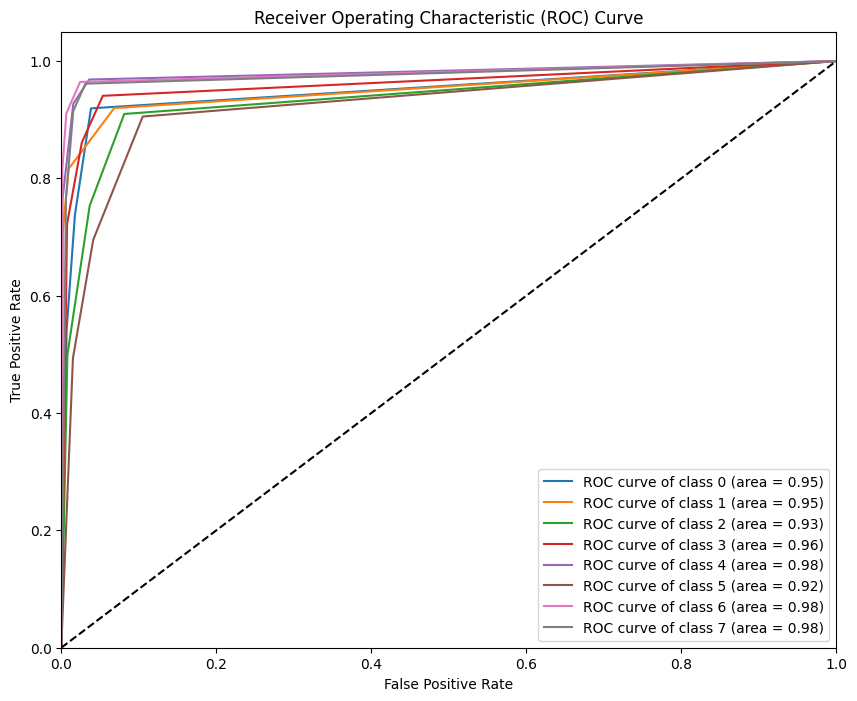

In [80]:
# prompt: generate a roc curve for this model

# Binarize the labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


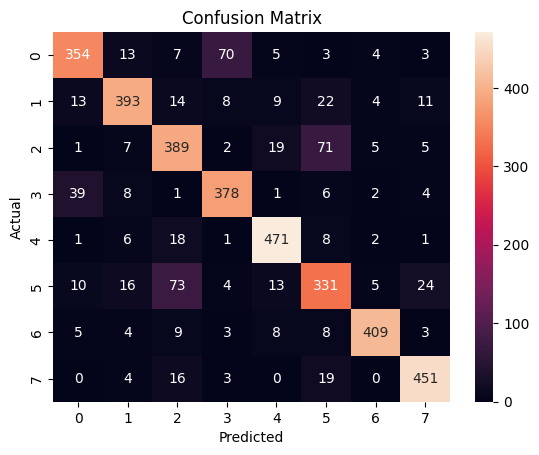

In [81]:
# prompt: give me visual confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d")

# Set labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


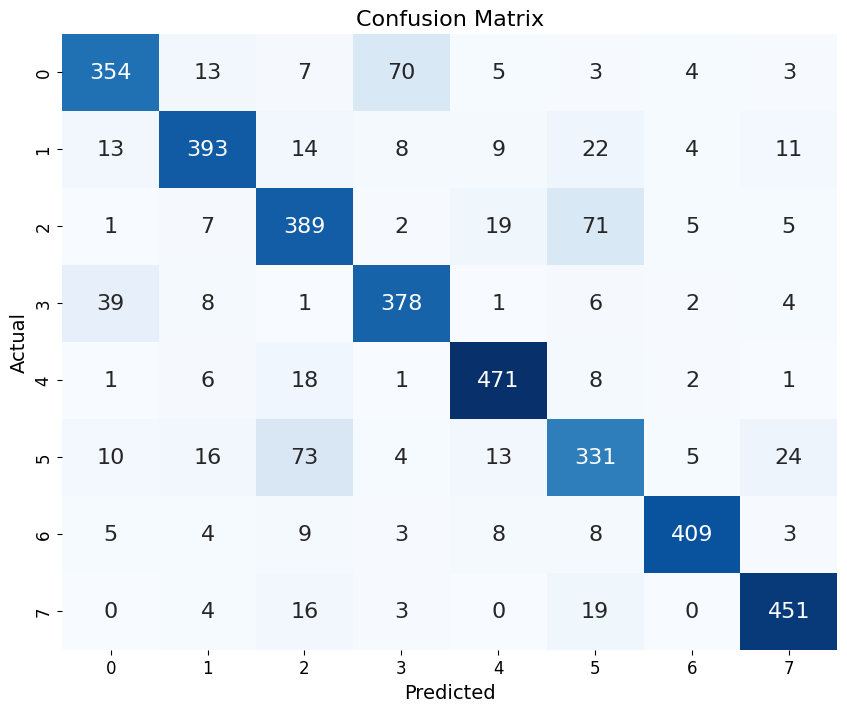

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 16})  # Use a visually appealing colormap and larger font size for annotations
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [83]:
# prompt: cross validation

from sklearn.model_selection import cross_val_score

# Assuming 'model' is your chosen model (e.g., LogisticRegression, SVC, etc.)
# and 'X_train' and 'y_train' are your training data

cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.82587228 0.81895984 0.81758314 0.8228515  0.82449786]
Mean cross-validation score: 0.8219529251151532


In [84]:
model.fit(X_train_mms,y_train)
print(model.score(X_test_mms,y_test))
model.fit(X_train_sc,y_train)
print(model.score(X_test_sc,y_test))

0.8685804582565183
0.8577824598367132


#Gradient Boosting (86%)

In [85]:
#gradiant boosting algorithm

from sklearn.ensemble import GradientBoostingClassifier

# Create and train the Gradient Boosting classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8644
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       459
           1       0.97      0.82      0.89       474
           2       0.71      0.93      0.81       499
           3       0.86      0.79      0.83       439
           4       0.98      1.00      0.99       508
           5       0.74      0.62      0.67       476
           6       0.98      0.97      0.97       449
           7       0.89      0.82      0.85       493

    accuracy                           0.86      3797
   macro avg       0.87      0.86      0.86      3797
weighted avg       0.87      0.86      0.86      3797



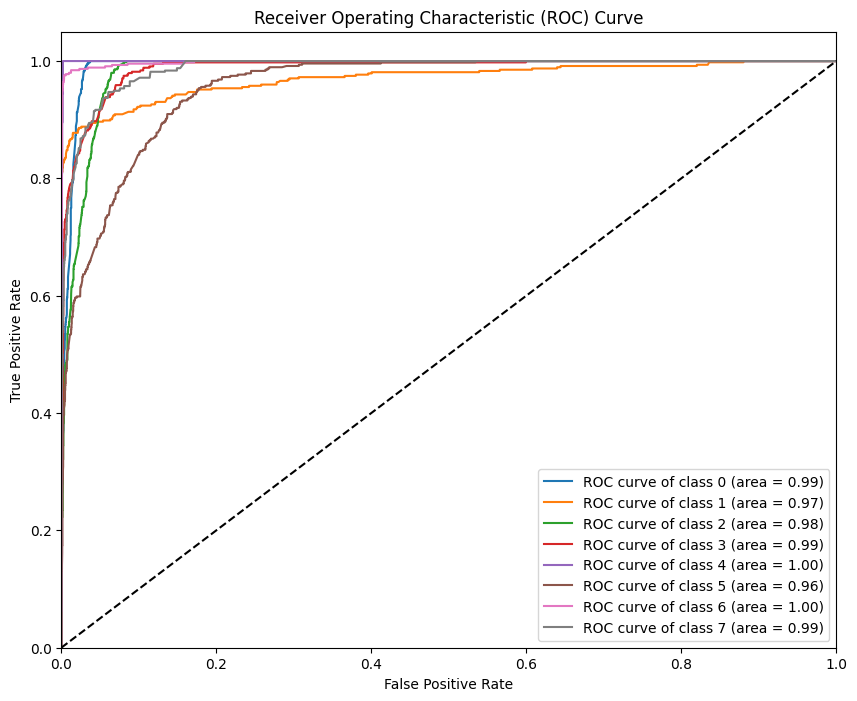

In [86]:
# prompt: generate a roc curve for the model

# Binarize the labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


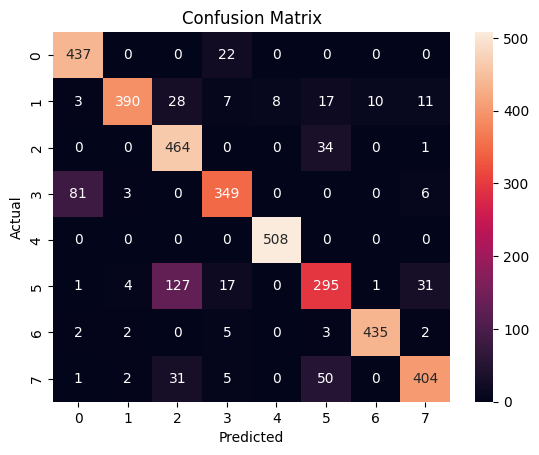

In [87]:

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d")

# Set labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

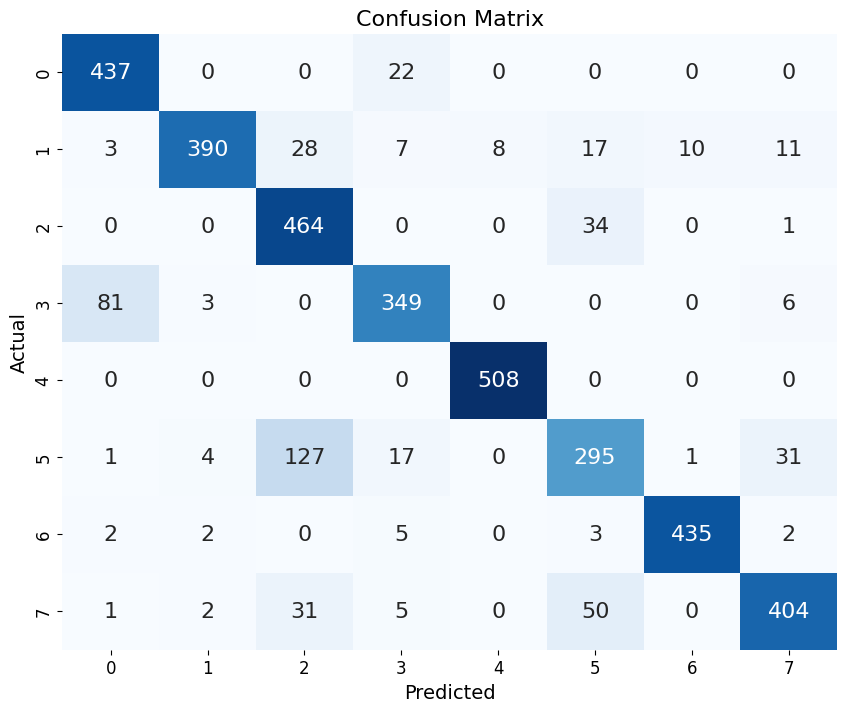

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 16})  # Use a visually appealing colormap and larger font size for annotations
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [89]:
# prompt: cross validation

from sklearn.model_selection import cross_val_score

# Assuming 'model' is your chosen model (e.g., LogisticRegression, SVC, etc.)
# and 'X_train' and 'y_train' are your training data

cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.86570112 0.85780118 0.85874218 0.856108   0.86631544]
Mean cross-validation score: 0.8609335856236978


In [90]:
model.fit(X_train_mms,y_train)
print(model.score(X_test_mms,y_test))
model.fit(X_train_sc,y_train)
print(model.score(X_test_sc,y_test))

0.8643666052146431
0.8643666052146431


#Decision Tree Classifier (89%)

In [91]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=None, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8923
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       459
           1       0.94      0.87      0.90       474
           2       0.80      0.86      0.83       499
           3       0.89      0.87      0.88       439
           4       0.99      0.99      0.99       508
           5       0.76      0.73      0.75       476
           6       0.97      0.96      0.97       449
           7       0.91      0.93      0.92       493

    accuracy                           0.89      3797
   macro avg       0.89      0.89      0.89      3797
weighted avg       0.89      0.89      0.89      3797



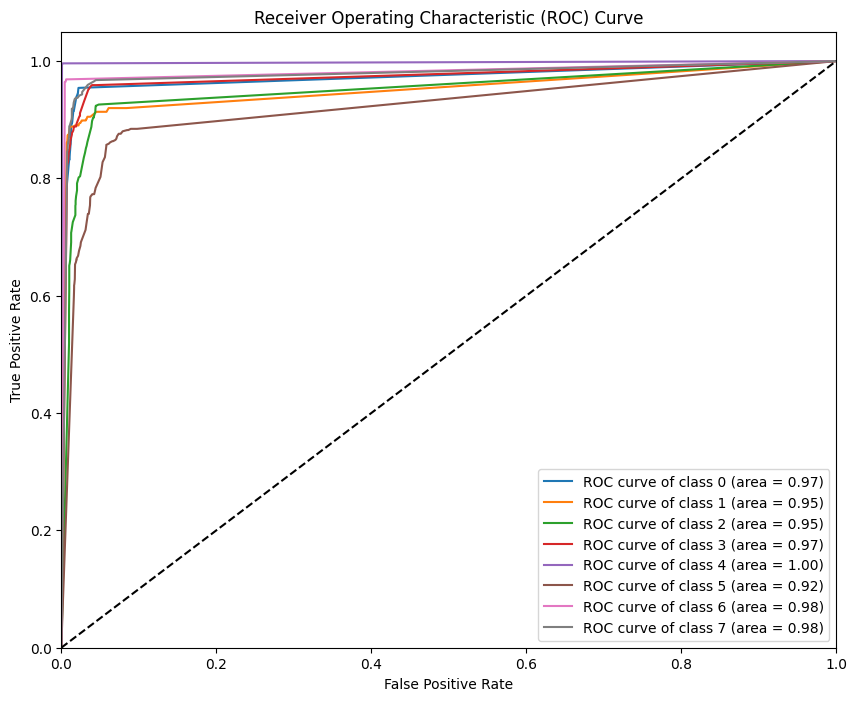

In [92]:
# prompt: generate a roc curve for this model

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


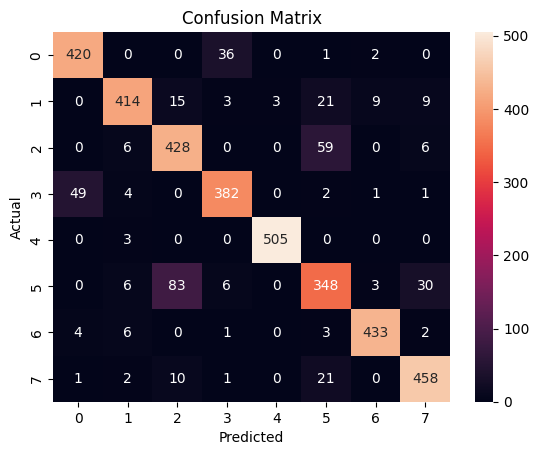

In [93]:
#confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d")

# Set labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


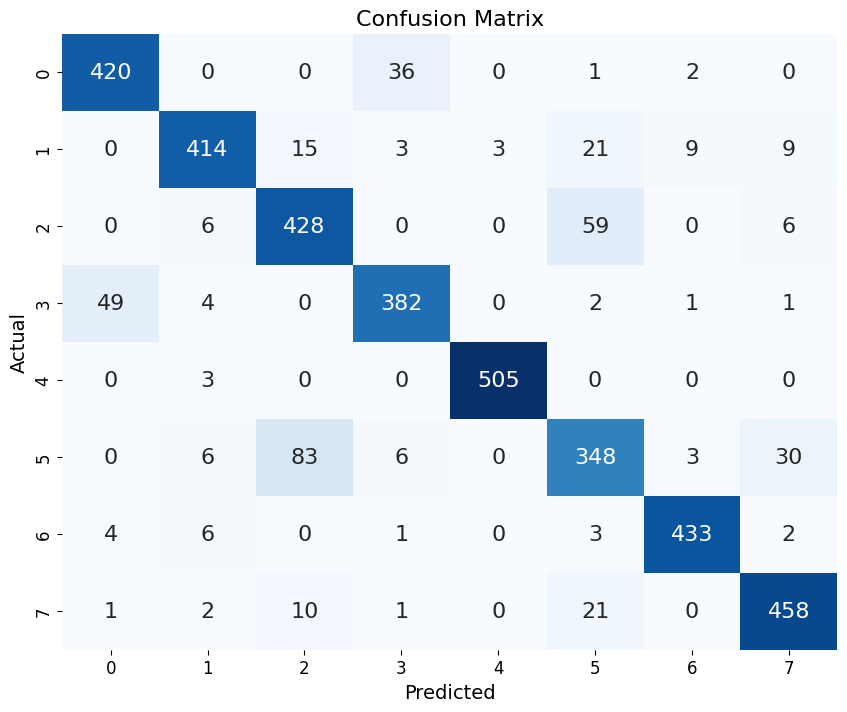

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 16})  # Use a visually appealing colormap and larger font size for annotations
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [95]:
# prompt: cross validation

from sklearn.model_selection import cross_val_score

# Assuming 'model' is your chosen model (e.g., LogisticRegression, SVC, etc.)
# and 'X_train' and 'y_train' are your training data

cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.8805135  0.88512179 0.88310833 0.88508396 0.89430359]
Mean cross-validation score: 0.8856262340937521


In [96]:
model.fit(X_train_mms,y_train)
print(model.score(X_test_mms,y_test))
model.fit(X_train_sc,y_train)
print(model.score(X_test_sc,y_test))

0.8922833816170661
0.8938635765077693


#Random Forest Classifier (90%)

In [97]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9070
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       459
           1       0.97      0.87      0.92       474
           2       0.80      0.89      0.85       499
           3       0.90      0.88      0.89       439
           4       0.99      1.00      0.99       508
           5       0.81      0.76      0.78       476
           6       0.98      0.97      0.97       449
           7       0.93      0.94      0.93       493

    accuracy                           0.91      3797
   macro avg       0.91      0.91      0.91      3797
weighted avg       0.91      0.91      0.91      3797



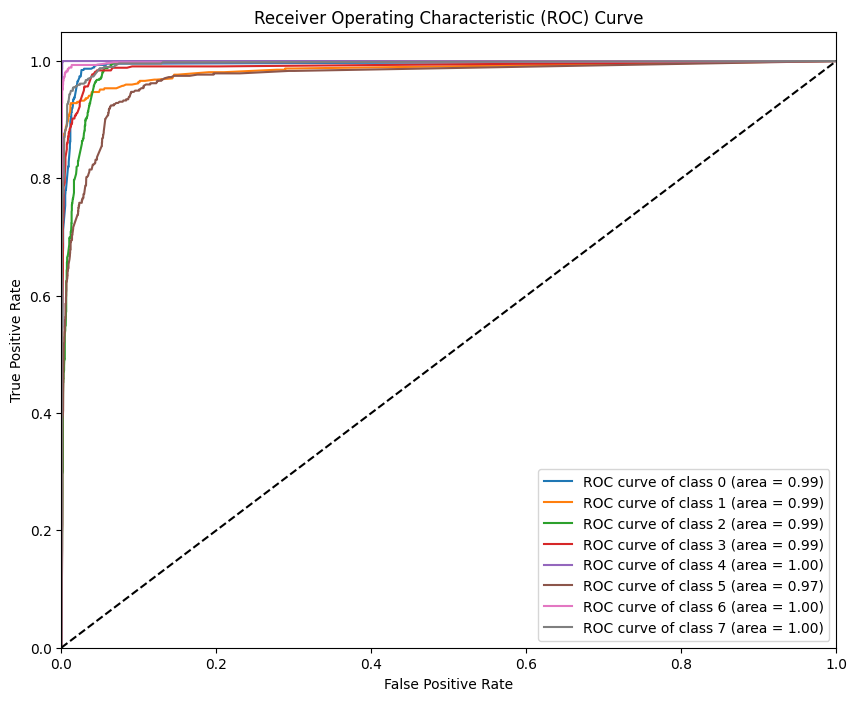

In [98]:
# prompt: generate a  roc curve for this model

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


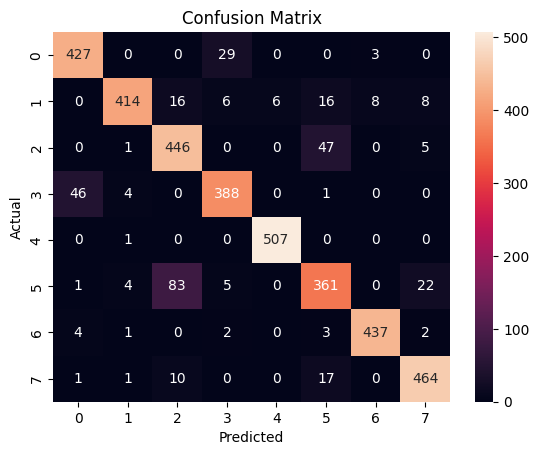

In [99]:
# prompt: give me visual confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d")

# Set labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


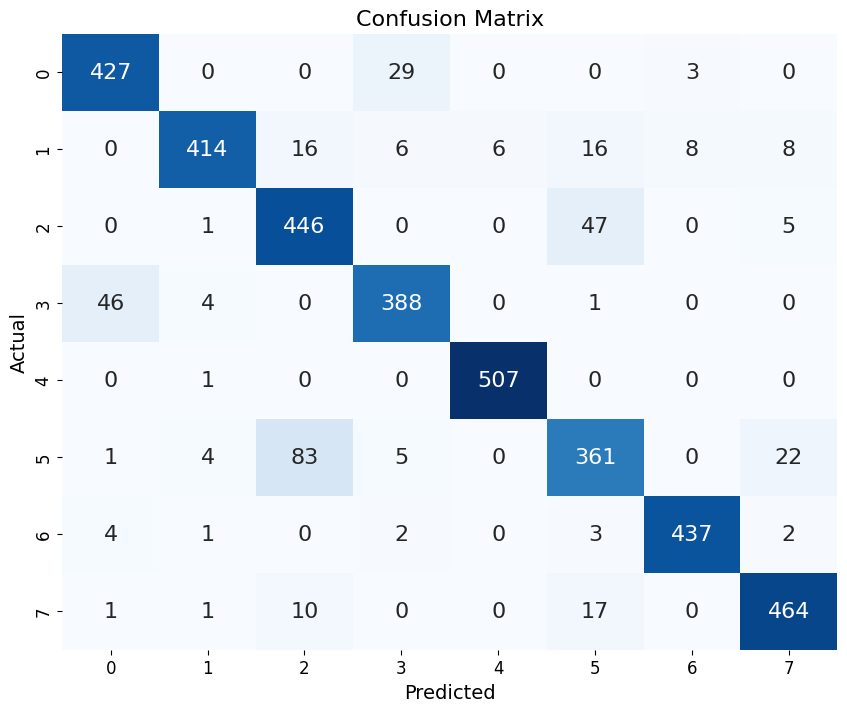

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 16})  # Use a visually appealing colormap and larger font size for annotations
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [101]:
# prompt: cross validation

from sklearn.model_selection import cross_val_score

# Assuming 'model' is your chosen model (e.g., LogisticRegression, SVC, etc.)
# and 'X_train' and 'y_train' are your training data

cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.90651745 0.9042133  0.90615739 0.9025354  0.91109648]
Mean cross-validation score: 0.9061040019266441


In [102]:
model.fit(X_train_mms,y_train)
print(model.score(X_test_mms,y_test))
model.fit(X_train_sc,y_train)
print(model.score(X_test_sc,y_test))

0.9075585988938636
0.9075585988938636


#Ending Time

In [103]:
end_time = time.time()
print("Elapsed time:", end_time - start_time, "seconds")

Elapsed time: 400.4516634941101 seconds


#Graphical representation of performance of models

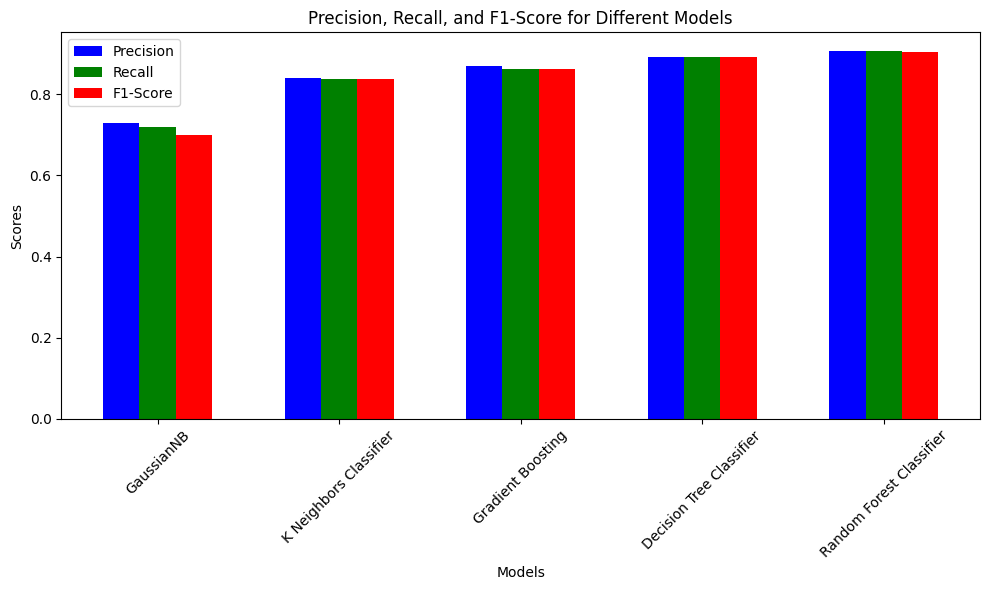

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

# Data extracted from the table
data = {
    "Algorithm": [
        "GaussianNB", "GaussianNB", "GaussianNB",
        "K Neighbors Classifier", "K Neighbors Classifier", "K Neighbors Classifier",
        "Gradient Boosting", "Gradient Boosting", "Gradient Boosting",
        "Decision Tree Classifier", "Decision Tree Classifier", "Decision Tree Classifier",
        "Random Forest Classifier", "Random Forest Classifier", "Random Forest Classifier"
    ],
    "Metric": [
        "Precision", "Recall", "F1-Score",
        "Precision", "Recall", "F1-Score",
        "Precision", "Recall", "F1-Score",
        "Precision", "Recall", "F1-Score",
        "Precision", "Recall", "F1-Score"
    ],
    "Class 0": [
        0.64, 0.99, 0.78,
        0.84, 0.78, 0.81,
        0.83, 0.95, 0.89,
        0.89, 0.92, 0.90,
        0.89, 0.93, 0.91
    ],
    "Class 1": [
        0.94, 0.68, 0.79,
        0.87, 0.83, 0.85,
        0.97, 0.82, 0.89,
        0.94, 0.87, 0.91,
        0.97, 0.87, 0.92
    ],
    "Class 2": [
        0.63, 1.00, 0.77,
        0.74, 0.78, 0.76,
        0.71, 0.93, 0.81,
        0.79, 0.86, 0.82,
        0.80, 0.89, 0.84
    ],
    "Class 3": [
        0.65, 0.42, 0.51,
        0.82, 0.86, 0.84,
        0.86, 0.79, 0.83,
        0.89, 0.87, 0.88,
        0.91, 0.88, 0.89
    ],
    "Class 4": [
        0.98, 0.98, 0.98,
        0.90, 0.93, 0.91,
        0.98, 1.00, 0.99,
        0.99, 0.99, 0.99,
        0.99, 1.00, 0.99
    ],
    "Class 5": [
        0.55, 0.23, 0.32,
        0.71, 0.70, 0.70,
        0.74, 0.62, 0.67,
        0.76, 0.73, 0.74,
        0.81, 0.76, 0.78
    ],
    "Class 6": [
        0.92, 0.89, 0.90,
        0.95, 0.91, 0.93,
        0.98, 0.97, 0.97,
        0.97, 0.96, 0.97,
        0.97, 0.98, 0.97
    ],
    "Class 7": [
        0.53, 0.56, 0.54,
        0.90, 0.91, 0.91,
        0.89, 0.82, 0.85,
        0.91, 0.93, 0.92,
        0.92, 0.94, 0.93
    ],
    "Macro Avg": [
        0.73, 0.72, 0.70,
        0.84, 0.84, 0.84,
        0.87, 0.86, 0.86,
        0.89, 0.89, 0.89,
        0.91, 0.91, 0.91
    ],
    "Weighted Avg": [
        0.73, 0.72, 0.70,
        0.84, 0.84, 0.84,
        0.87, 0.86, 0.86,
        0.89, 0.89, 0.89,
        0.91, 0.91, 0.91
    ],
    "Accuracy": [
        0.7227, "", "",
        0.8378, "", "",
        0.8644, "", "",
        0.8920, "", "",
        0.9068, "", ""
    ]
}

# Convert to DataFrame
df_table = pd.DataFrame(data)

# Plot settings
models = df_table["Algorithm"].unique()

# Extract Precision, Recall, and F1-Score for each model
precision = df_table[df_table["Metric"] == "Precision"].iloc[:, 2:10].mean(axis=1)
recall = df_table[df_table["Metric"] == "Recall"].iloc[:, 2:10].mean(axis=1)
f1_score = df_table[df_table["Metric"] == "F1-Score"].iloc[:, 2:10].mean(axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

index = range(len(models))
bar_width = 0.2

# Bar plot for Precision, Recall, F1-Score
plt.bar(index, precision, bar_width, label='Precision', color='b')
plt.bar([i + bar_width for i in index], recall, bar_width, label='Recall', color='g')
plt.bar([i + bar_width*2 for i in index], f1_score, bar_width, label='F1-Score', color='r')

# Labels and titles
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-Score for Different Models')
plt.xticks([i + bar_width for i in index], models, rotation=45)
plt.legend()

# Display plot
plt.tight_layout()
plt.show()


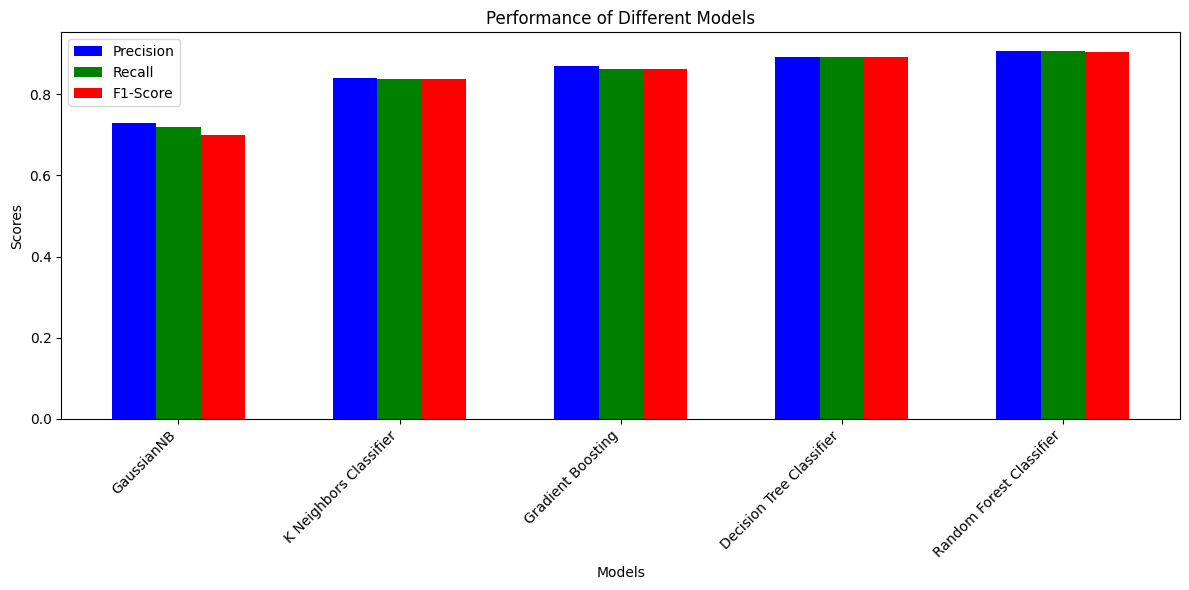

In [105]:
# prompt: make the graph more varsatile

import warnings
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


# ... (Your existing code) ...


# Graphical representation of performance of models

# Data extracted from the table
data = {
    "Algorithm": [
        "GaussianNB", "GaussianNB", "GaussianNB",
        "K Neighbors Classifier", "K Neighbors Classifier", "K Neighbors Classifier",
        "Gradient Boosting", "Gradient Boosting", "Gradient Boosting",
        "Decision Tree Classifier", "Decision Tree Classifier", "Decision Tree Classifier",
        "Random Forest Classifier", "Random Forest Classifier", "Random Forest Classifier"
    ],
    "Metric": [
        "Precision", "Recall", "F1-Score",
        "Precision", "Recall", "F1-Score",
        "Precision", "Recall", "F1-Score",
        "Precision", "Recall", "F1-Score",
        "Precision", "Recall", "F1-Score"
    ],
    "Class 0": [
        0.64, 0.99, 0.78,
        0.84, 0.78, 0.81,
        0.83, 0.95, 0.89,
        0.89, 0.92, 0.90,
        0.89, 0.93, 0.91
    ],
    "Class 1": [
        0.94, 0.68, 0.79,
        0.87, 0.83, 0.85,
        0.97, 0.82, 0.89,
        0.94, 0.87, 0.91,
        0.97, 0.87, 0.92
    ],
    "Class 2": [
        0.63, 1.00, 0.77,
        0.74, 0.78, 0.76,
        0.71, 0.93, 0.81,
        0.79, 0.86, 0.82,
        0.80, 0.89, 0.84
    ],
    "Class 3": [
        0.65, 0.42, 0.51,
        0.82, 0.86, 0.84,
        0.86, 0.79, 0.83,
        0.89, 0.87, 0.88,
        0.91, 0.88, 0.89
    ],
    "Class 4": [
        0.98, 0.98, 0.98,
        0.90, 0.93, 0.91,
        0.98, 1.00, 0.99,
        0.99, 0.99, 0.99,
        0.99, 1.00, 0.99
    ],
    "Class 5": [
        0.55, 0.23, 0.32,
        0.71, 0.70, 0.70,
        0.74, 0.62, 0.67,
        0.76, 0.73, 0.74,
        0.81, 0.76, 0.78
    ],
    "Class 6": [
        0.92, 0.89, 0.90,
        0.95, 0.91, 0.93,
        0.98, 0.97, 0.97,
        0.97, 0.96, 0.97,
        0.97, 0.98, 0.97
    ],
    "Class 7": [
        0.53, 0.56, 0.54,
        0.90, 0.91, 0.91,
        0.89, 0.82, 0.85,
        0.91, 0.93, 0.92,
        0.92, 0.94, 0.93
    ],
    "Macro Avg": [
        0.73, 0.72, 0.70,
        0.84, 0.84, 0.84,
        0.87, 0.86, 0.86,
        0.89, 0.89, 0.89,
        0.91, 0.91, 0.91
    ],
    "Weighted Avg": [
        0.73, 0.72, 0.70,
        0.84, 0.84, 0.84,
        0.87, 0.86, 0.86,
        0.89, 0.89, 0.89,
        0.91, 0.91, 0.91
    ],
    "Accuracy": [
        0.7227, "", "",
        0.8378, "", "",
        0.8644, "", "",
        0.8920, "", "",
        0.9068, "", ""
    ]
}

# Convert to DataFrame
df_table = pd.DataFrame(data)

# Plot settings
models = df_table["Algorithm"].unique()
metrics = df_table["Metric"].unique()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Define colors for each metric
colors = ['blue', 'green', 'red']

# Define the width of the bars
bar_width = 0.2

# Loop through the metrics
for i, metric in enumerate(metrics):
  # Extract the scores for the current metric
  scores = df_table[df_table["Metric"] == metric].iloc[:, 2:10].mean(axis=1)

  # Calculate the x-coordinates for the bars
  x_coords = np.arange(len(models)) + i * bar_width

  # Create the bars
  ax.bar(x_coords, scores, width=bar_width, label=metric, color=colors[i])

# Set the x-axis tick labels
ax.set_xticks(np.arange(len(models)) + bar_width)
ax.set_xticklabels(models, rotation=45, ha='right')

# Set the axis labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance of Different Models')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


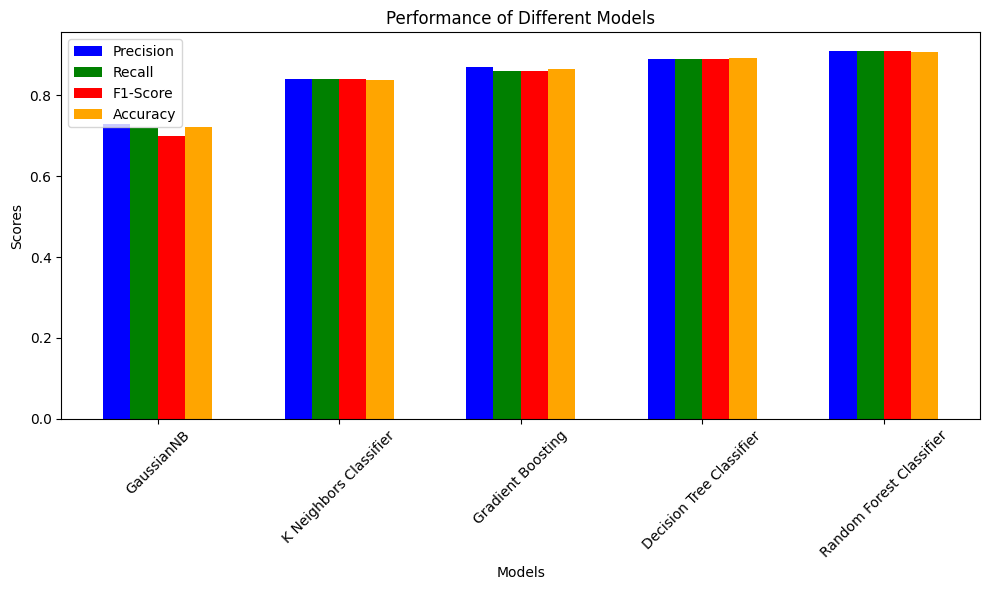

In [107]:
# prompt: generate different graphs for the models

# ... (Your existing code) ...

# Graphical representation of performance of models

# Data extracted from the table
data = {
    "Algorithm": [
        "GaussianNB", "K Neighbors Classifier", "Gradient Boosting",
        "Decision Tree Classifier", "Random Forest Classifier"
    ],
    "Precision": [0.73, 0.84, 0.87, 0.89, 0.91],
    "Recall": [0.72, 0.84, 0.86, 0.89, 0.91],
    "F1-Score": [0.70, 0.84, 0.86, 0.89, 0.91],
    "Accuracy": [0.7227, 0.8378, 0.8644, 0.8920, 0.9068]
}

# Convert to DataFrame
df_table = pd.DataFrame(data)

# Bar plot for Precision, Recall, F1-Score, and Accuracy
fig, ax = plt.subplots(figsize=(10, 6))

index = range(len(df_table["Algorithm"]))
bar_width = 0.15

plt.bar(index, df_table["Precision"], bar_width, label='Precision', color='b')
plt.bar([i + bar_width for i in index], df_table["Recall"], bar_width, label='Recall', color='g')
plt.bar([i + bar_width * 2 for i in index], df_table["F1-Score"], bar_width, label='F1-Score', color='r')
plt.bar([i + bar_width * 3 for i in index], df_table["Accuracy"], bar_width, label='Accuracy', color='orange')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance of Different Models')
plt.xticks([i + bar_width * 1.5 for i in index], df_table["Algorithm"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



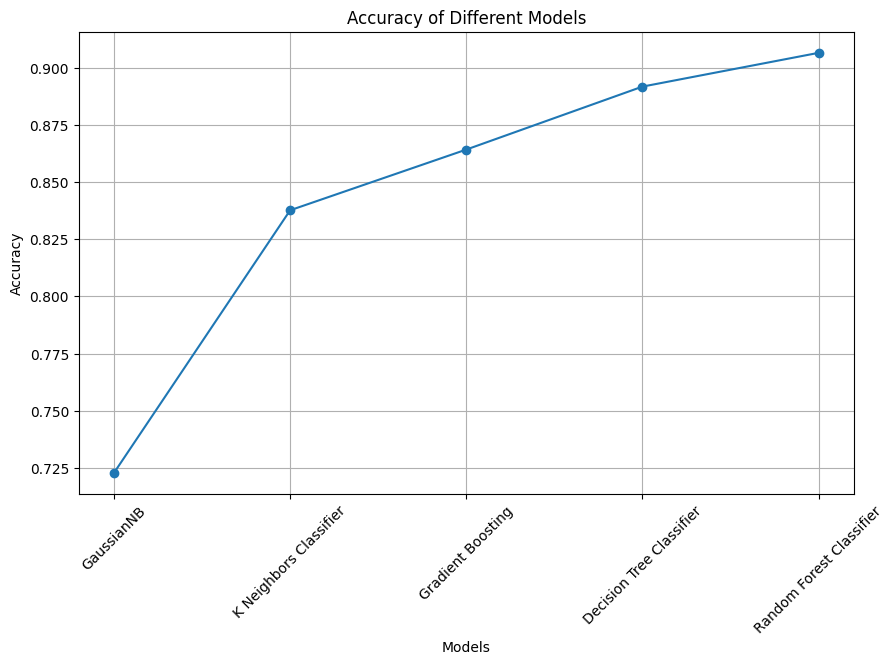

In [108]:

# Line plot for Accuracy
plt.figure(figsize=(10, 6))
plt.plot(df_table["Algorithm"], df_table["Accuracy"], marker='o')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




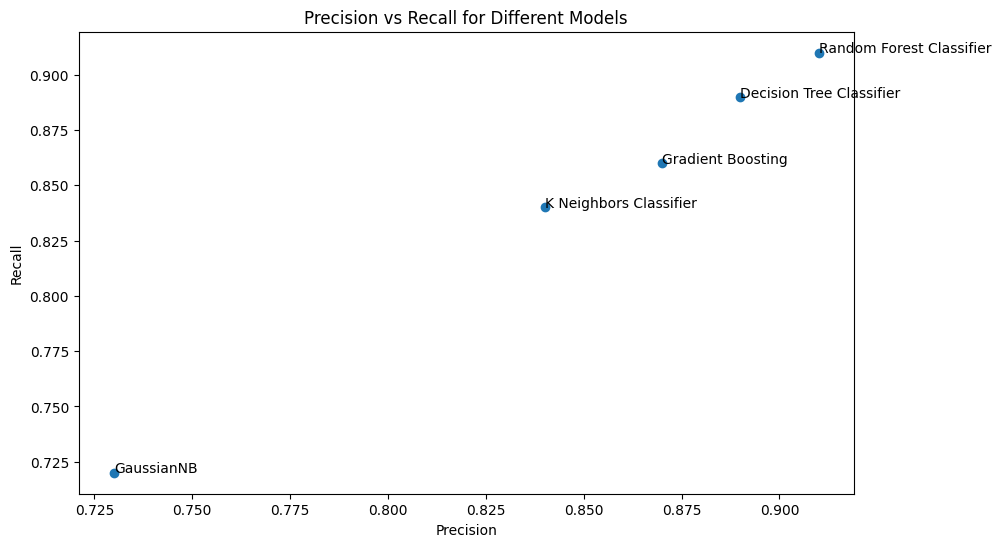

In [109]:

# Scatter plot for Precision vs Recall
plt.figure(figsize=(10, 6))
plt.scatter(df_table["Precision"], df_table["Recall"])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs Recall for Different Models')
for i, txt in enumerate(df_table["Algorithm"]):
    plt.annotate(txt, (df_table["Precision"][i], df_table["Recall"][i]))
plt.show()